1. PROJECT TITLE- REAL ESTATE INVESTMENT ADVISOR: PREDICTING PROPERTY PROFITABILITY & FUTURE VALUE.

2. PROJECT SUMMARY- 

    This project builds a machine learning–based Real Estate Investment Advisor that helps evaluate property profitability and predict investment outcomes. The workflow covers the complete pipeline from data preparation to model development and deployment.

    The key components of the project are:


    - Data Wrangling and EDA:

        Cleaning and preparing the dataset, confirming there were no missing or duplicate values, transforming columns, and performing exploratory analysis to understand pricing trends.


    - Feature Engineering:

        Creating new features such as appreciation rate and 5-year future price and preparing relevant features for prediction tasks.


    - Machine Learning Models:

        Regression models for predicting appreciation rate and property price.
        Classification model for predicting investment type into four categories: bad, average, good, and very good.


    - Model Selection:

        Evaluating baseline models, applying cross-validation, and selecting the best-performing models (Random Forest and XGBoost) based on MAE and weighted F1-score.


    - Model Saving and Logging:

        Exporting the final selected models and necessary encoders using joblib and registering and logging the final models using MLflow.


    - Deployment with Streamlit:

        Building an interactive dashboard where users input property details and view predictions in real time.


    This project provides a complete practical ML workflow for assisting property investors with data-driven insights.

3. PROBLEM STATEMENT-

    Develop a machine learning application to assist potential investors in making real estate decisions. The system should:
        
        - Preprocess and analyse the data.
        
        - Engineer relevant features.
        
        - Classify whether a property is a "Good Investment" (Classification).
        
        - Predict the estimated property price after 5 years (Regression).

4. DATA WRANGLING-

In [2]:
# Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew,kurtosis
warnings.filterwarnings('ignore')

In [3]:
# Storing the csv file as a pandas dataframe
data=pd.read_csv(r"C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\india_housing_prices.csv")
df=pd.DataFrame(data)

In [4]:
# Prevent truncating
pd.set_option('display.max_columns',None)

In [5]:
# Checking the first few rows of the dataframe
df.head(6)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,Semi-furnished,27,1,5,7,7,Low,Yes,Yes,"Playground, Clubhouse",West,Broker,Ready_to_Move


In [6]:
# Checking the number of rows and columns of the dataset
df.shape

(250000, 23)

In [7]:
# Checking the name of the column heads
df.columns.to_list()

['ID',
 'State',
 'City',
 'Locality',
 'Property_Type',
 'BHK',
 'Size_in_SqFt',
 'Price_in_Lakhs',
 'Price_per_SqFt',
 'Year_Built',
 'Furnished_Status',
 'Floor_No',
 'Total_Floors',
 'Age_of_Property',
 'Nearby_Schools',
 'Nearby_Hospitals',
 'Public_Transport_Accessibility',
 'Parking_Space',
 'Security',
 'Amenities',
 'Facing',
 'Owner_Type',
 'Availability_Status']

In [8]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [9]:
# Checking whether any column has null values
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [10]:
# Checking whether there are duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

5. DATA VISUALISATION-

I. Visualising the number of properties per state- Pie Chart.

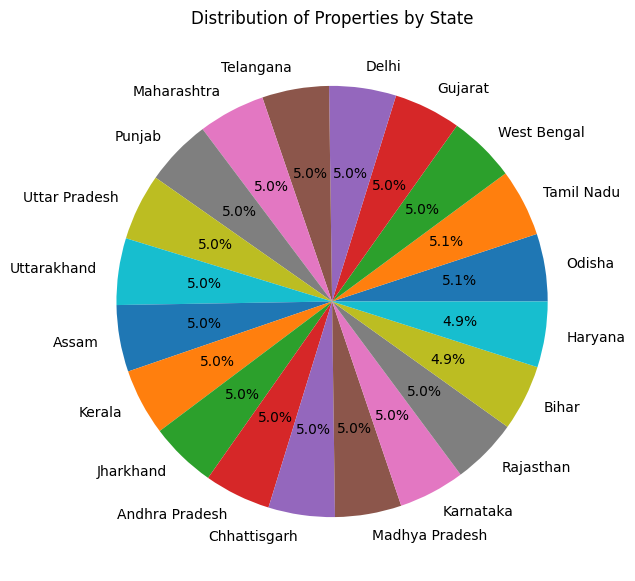

In [11]:
plt.figure(figsize=(24,7))
plt.pie(df['State'].value_counts().values,labels=df['State'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Properties by State')
plt.show()

Insights:
- Tamil Nadu and Odisha have the highest percentage of property listings.
- Haryana and Bihar have the lowest percentage of property listings.

II. Visualising the distribution of properties by city- Heatmap.

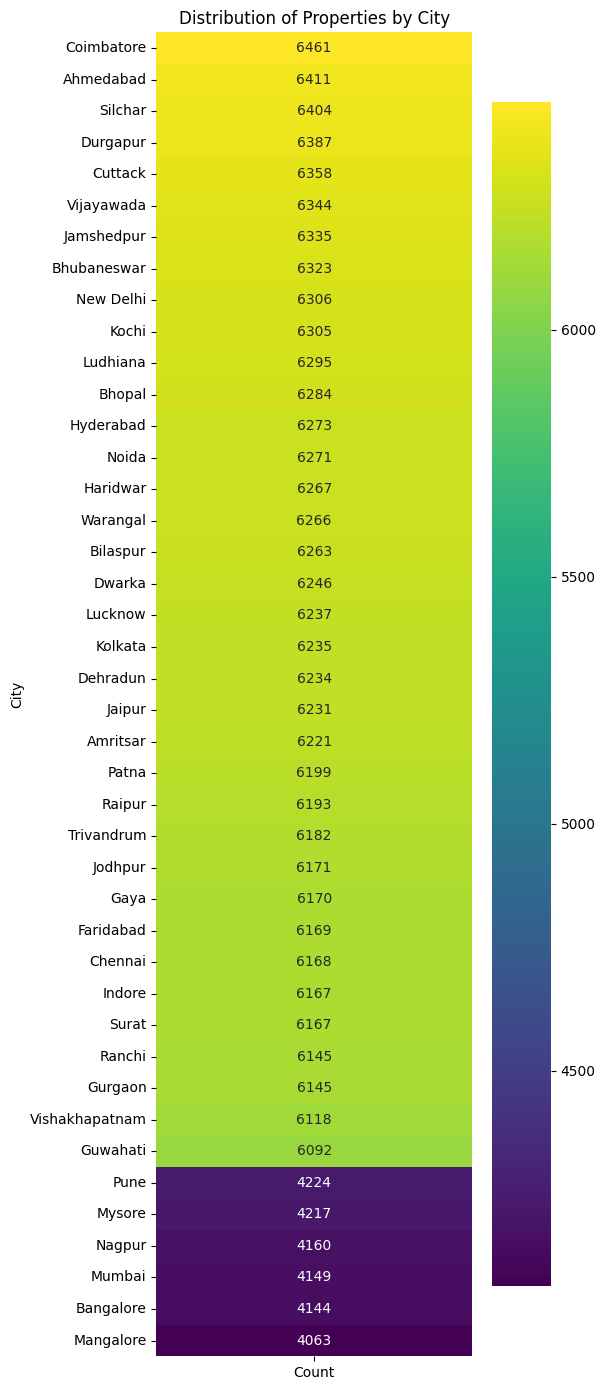

In [12]:
# Computing and sorting counts per city
city_count=df['City'].value_counts().sort_values(ascending=False)

# Converting it to a 2D array for heatmap
heat_data=pd.DataFrame(city_count)
heat_data.columns=['Count']

# Plotting the heatmap
plt.figure(figsize=(6,14))
sns.heatmap(heat_data,annot=True,fmt='d',cmap='viridis',cbar=True)
plt.title('Distribution of Properties by City')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Insights:
- Coimbatore has the highest property listings (6461).
- Mangalore has the lowest property listings (4063).

III. Visualising top 10 localities with property listings- Bar Graph.

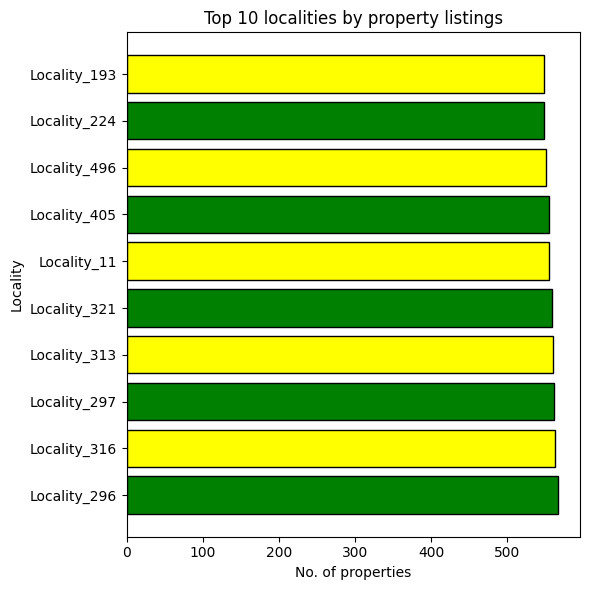

In [13]:
# Getting the counts of the top 10 localities
loc_count=df['Locality'].value_counts().head(10)

# Plotting the treemap
plt.figure(figsize=(6,6))
plt.barh(loc_count.index,loc_count.values,edgecolor='black',color=['green','yellow'])
plt.title('Top 10 localities by property listings')
plt.xlabel('No. of properties')
plt.ylabel('Locality')
plt.tight_layout()
plt.show()

Insights:
- All the mentioned 42 cities in this dataset have 500 localities.
- Locality 296 in each of the 42 cities have the highest property listings in total.

IV. Visualising the distribution of Property types- Pie Chart.

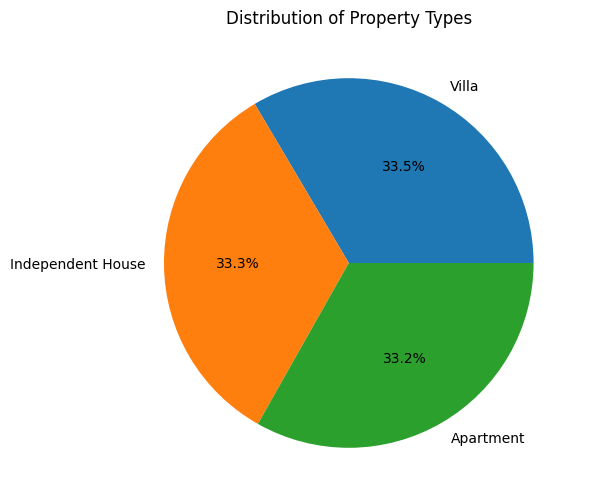

In [14]:
plt.figure(figsize=(8,6))
plt.pie(df['Property_Type'].value_counts().values,labels=df['Property_Type'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Property Types')
plt.show()

Insights:
- Property listing for villas are the highest.

V. Visualising the distribution of Properties by BHK- Pie Chart.

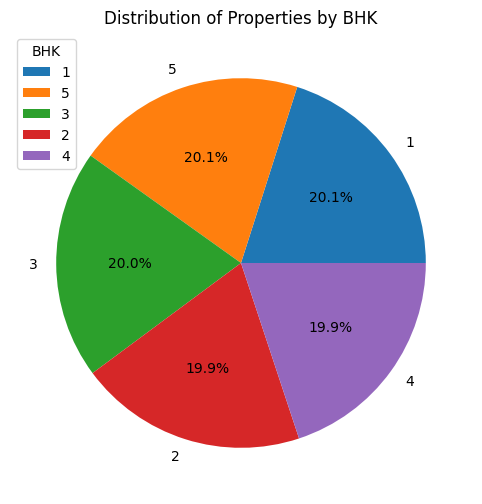

In [15]:
plt.figure(figsize=(8,6))
plt.pie(df['BHK'].value_counts().values,labels=df['BHK'].value_counts().index,autopct='%1.1f%%')
plt.title('Distribution of Properties by BHK')
plt.legend(loc='upper left',title='BHK')
plt.show()

Insights:
- Properties with 5 BHK have the highest listings.
- Properties with 2 and 4 BHK have the lowest listings.

VI. Visualising the distribution of properties as per their sizes in square feet- Histogram.

Skewness: 0.0007959524761505655
Kurtosis: -1.2003078183107332


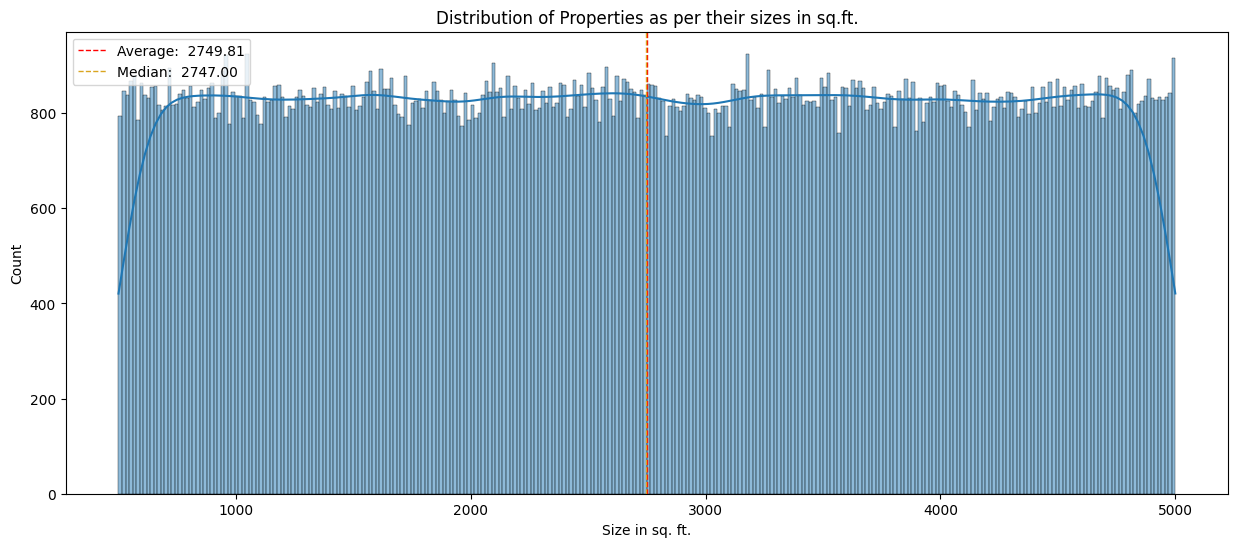

In [16]:
print("Skewness:",skew(df['Size_in_SqFt']))
print("Kurtosis:",kurtosis(df['Size_in_SqFt']))
plt.figure(figsize=(15,6))
sns.histplot(df['Size_in_SqFt'],bins=300,edgecolor='black',kde=True)
plt.axvline(df['Size_in_SqFt'].mean(),linestyle='--',linewidth=1,color='red',label=f"Average: {df['Size_in_SqFt'].mean(): .2f}")
plt.axvline(df['Size_in_SqFt'].median(),linestyle='--',linewidth=1,color='goldenrod',label=f"Median: {df['Size_in_SqFt'].median(): .2f}")
plt.title('Distribution of Properties as per their sizes in sq.ft.')
plt.xlabel('Size in sq. ft.')
plt.legend()
plt.show()

Insights:
- The average size of the properties is almost 2750 sq. ft.
- The median size of the properties is 2747 sq. ft.
- The data is sligthly right skewed as the skewness is positive, showing that the average size is slightly greater than the median.
- The data is platykurtic as the kurtosis value is less than 0, which shows that outliers are less frequent.

VII. Visualising the distribution of price of the properties- Histogram.

Skewness: 0.00820583479574379
Kurtosis: -1.198798489241503


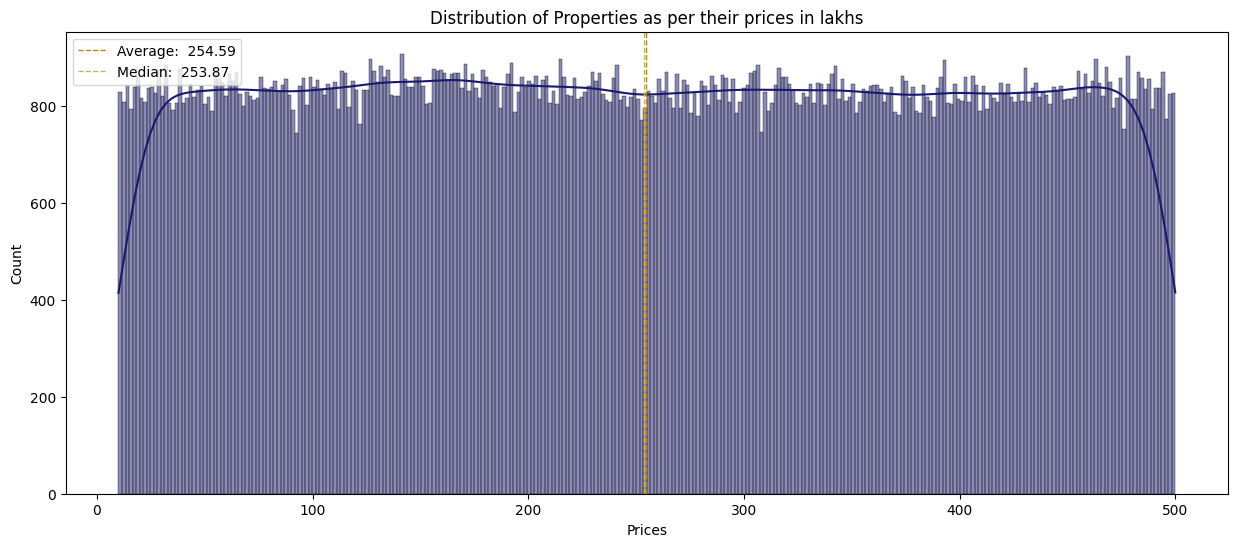

In [17]:
print("Skewness:",skew(df['Price_in_Lakhs']))
print("Kurtosis:",kurtosis(df['Price_in_Lakhs']))
plt.figure(figsize=(15,6))
sns.histplot(df['Price_in_Lakhs'],bins=300,edgecolor='black',color='midnightblue',kde=True)
plt.axvline(df['Price_in_Lakhs'].mean(),linestyle='--',linewidth=1,color='darkgoldenrod',label=f"Average: {df['Price_in_Lakhs'].mean(): .2f}")
plt.axvline(df['Price_in_Lakhs'].median(),linestyle='--',linewidth=1,color='darkkhaki',label=f"Median: {df['Price_in_Lakhs'].median(): .2f}")
plt.title('Distribution of Properties as per their prices in lakhs')
plt.xlabel('Prices')
plt.legend()
plt.show()

Insights:
- The average price of the properties is ₹2,54,59,000.
- The median price of the properties is ₹2,53,87,000.
- The data is sligthly right skewed as the skewness is positive, showing that the average price is slightly greater than the median.
- The data is platykurtic as the kurtosis value is less than 0, which shows that outliers are less frequent.

VIII. Visualising the distribution of price per sq. ft. for the properties- Histogram.

Skewness: 2.3186540314272657
Kurtosis: 6.7080138952303034


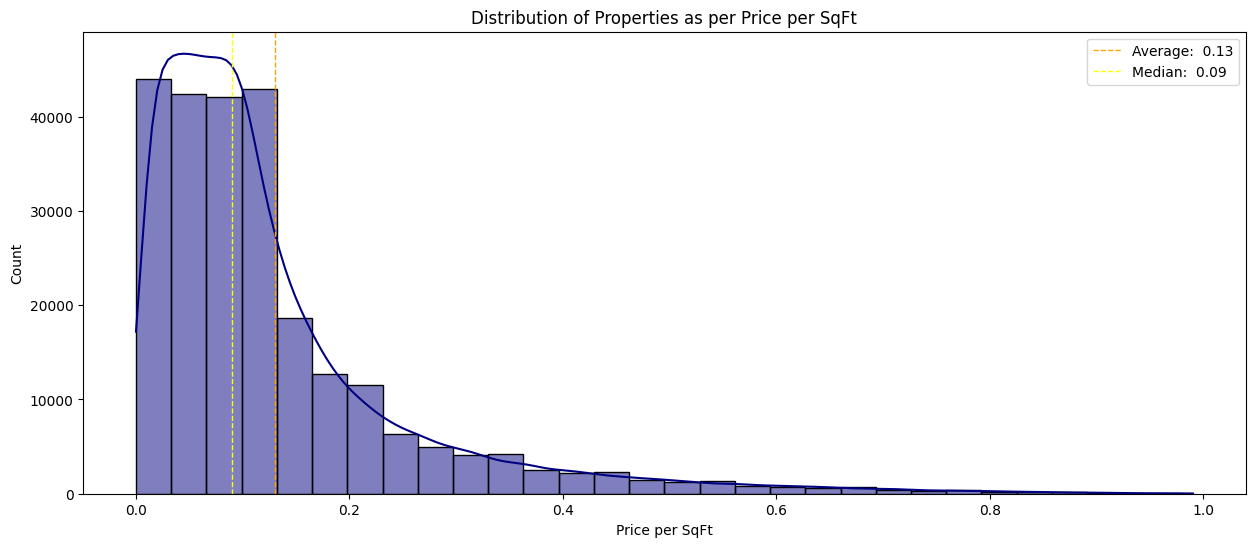

In [18]:
print("Skewness:",skew(df['Price_per_SqFt']))
print("Kurtosis:",kurtosis(df['Price_per_SqFt']))
plt.figure(figsize=(15,6))
sns.histplot(df['Price_per_SqFt'],bins=30,edgecolor='black',color='navy',kde=True)
plt.axvline(df['Price_per_SqFt'].mean(),linestyle='--',linewidth=1,color='orange',label=f"Average: {df['Price_per_SqFt'].mean(): .2f}")
plt.axvline(df['Price_per_SqFt'].median(),linestyle='--',linewidth=1,color='yellow',label=f"Median: {df['Price_per_SqFt'].median(): .2f}")
plt.title('Distribution of Properties as per Price per SqFt')
plt.xlabel('Price per SqFt')
plt.legend()
plt.show()

Insights:
- The average price/sq.ft. of the properties is ₹13,000.
- The median price/sq.ft. of the properties is ₹9000.
- The data is right skewed as the skewness is positive, showing that the average price/sq.ft. is greater than the median.
- The data is leptokurtic as the kurtosis value is more than 0, which shows that outliers are more frequent.

IX. Visualising the distribution of the construction years of these properties- Histogram.

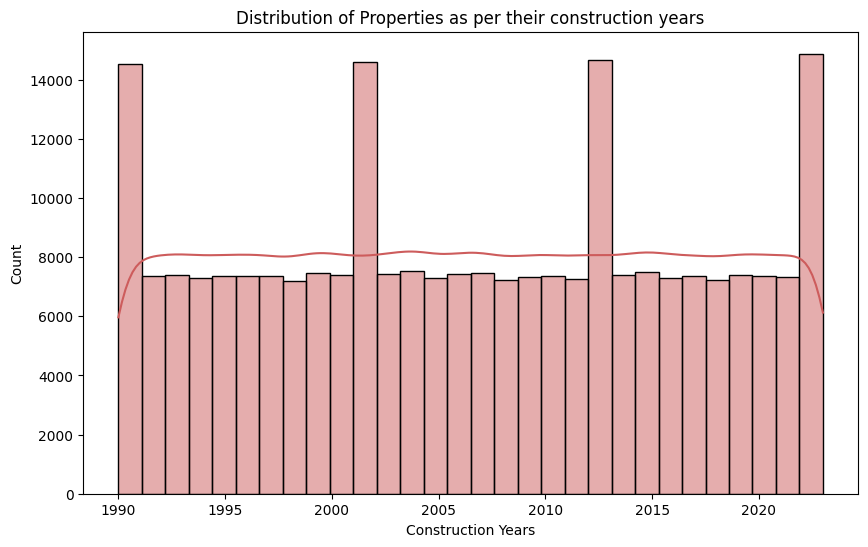

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Year_Built'],bins=30,edgecolor='black',color='indianred',kde=True)
plt.title('Distribution of Properties as per their construction years')
plt.xlabel('Construction Years')
plt.show()

Insights:
- The construction of the properties are almost fairly distributed over the years.
- There are periodic surges in the construction activity in the early 90's, 2000's, 2010's and 2020's.

X. Visualising the distribution of the furnishing levels of the properties (furnished, unfurnished, semi-furnished)- Pie Chart.

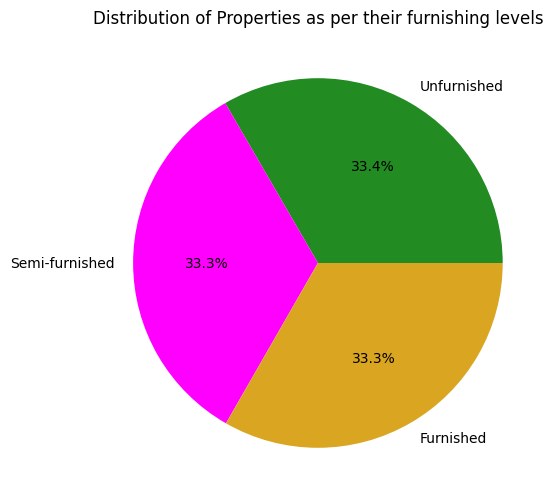

In [20]:
plt.figure(figsize=(8,6))
plt.pie(df['Furnished_Status'].value_counts().values,labels=df['Furnished_Status'].value_counts().index,colors=['forestgreen','fuchsia','goldenrod'],autopct='%1.1f%%')
plt.title('Distribution of Properties as per their furnishing levels')
plt.show()

Insights:
- Most of the properties that are listed are unfurnished.

XI. Visualisation of the distribution of properties by their age- Histogram.

Skewness: 0.0001666136835847578
Kurtosis: -1.2001909722206727


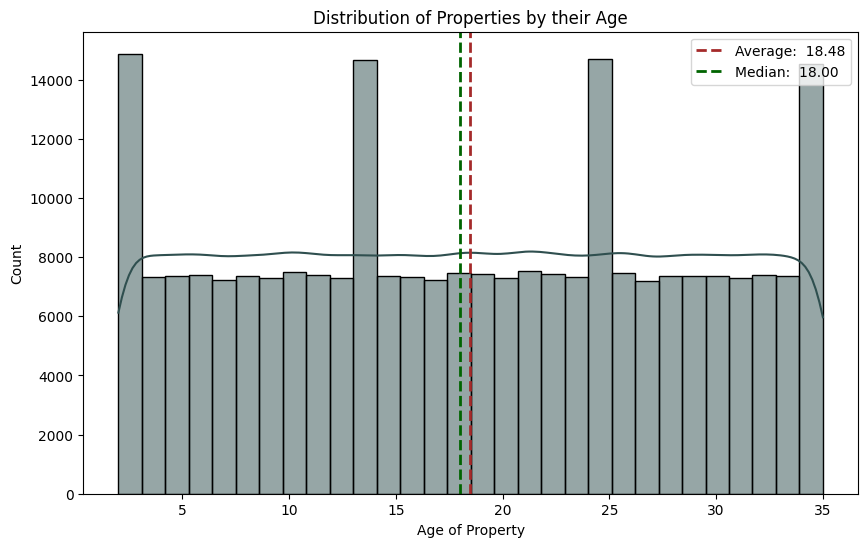

In [21]:
print("Skewness:",skew(df['Age_of_Property']))
print("Kurtosis:",kurtosis(df['Age_of_Property']))
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_Property'],bins=30,edgecolor='black',color='darkslategray',kde=True)
plt.axvline(df['Age_of_Property'].mean(),linestyle='--',linewidth=2,color='brown',label=f"Average: {df['Age_of_Property'].mean(): .2f}")
plt.axvline(df['Age_of_Property'].median(),linestyle='--',linewidth=2,color='darkgreen',label=f"Median: {df['Age_of_Property'].median(): .2f}")
plt.title('Distribution of Properties by their Age')
plt.legend()
plt.xlabel('Age of Property')
plt.show()

Insights:
- The average age of the properties is 18.48 years.
- The median age of the properties is 18 years.
- The data is slightly right skewed as the skewness is positive, showing that the average age is slightly greater than the median.
- The data is platykurtic as the kurtosis value is less than 0, which shows that outliers are less frequent.
- Many properties with higher age are listed in the dataset making the graph slightly skewed towards the right.

XII. Visualising the distribution of Nearby Schools- Histogram.

Skewness: -0.0012581042212357985
Kurtosis: -1.2278246196803628


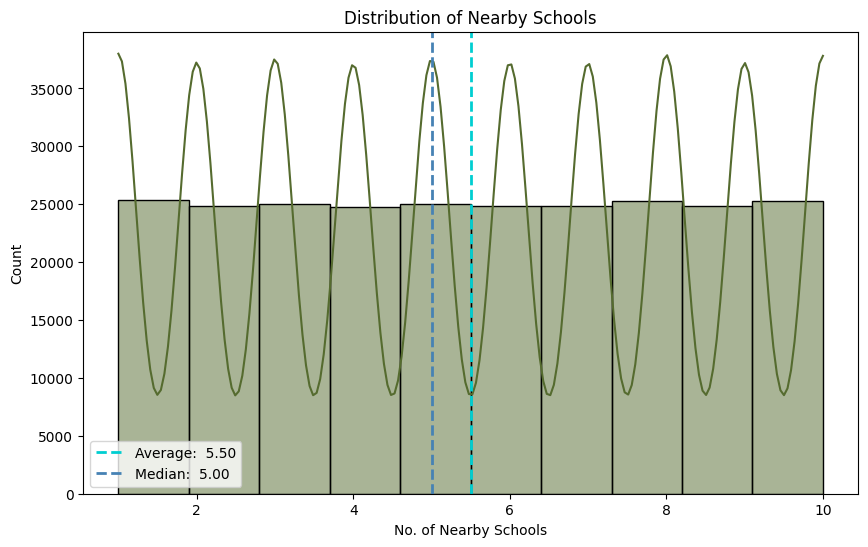

In [22]:
print("Skewness:",skew(df['Nearby_Schools']))
print("Kurtosis:",kurtosis(df['Nearby_Schools']))
plt.figure(figsize=(10,6))
sns.histplot(df['Nearby_Schools'],bins=10,edgecolor='black',color='darkolivegreen',kde=True)
plt.axvline(df['Nearby_Schools'].mean(),linestyle='--',linewidth=2,color='darkturquoise',label=f"Average: {df['Nearby_Schools'].mean(): .2f}")
plt.axvline(df['Nearby_Schools'].median(),linestyle='--',linewidth=2,color='steelblue',label=f"Median: {df['Nearby_Schools'].median(): .2f}")
plt.title('Distribution of Nearby Schools')
plt.legend()
plt.xlabel('No. of Nearby Schools')
plt.show()

Insights:
- The average number of nearby schools are 5.50.
- The median number of nearby schools are 5.
- The data is slightly left skewed as the skewness is negative, even when the average number is slightly greater than the median.
- The data is platykurtic as the kurtosis value is less than 0, which shows that outliers are less frequent.
- Lots of properties listed in the dataset have lower number of nearby schools which is the reason the data is slightly skewed towards the left.

XIII. Visualising the Distribution of Nearby Hospitals- Histogram.

Skewness: 0.0010991167851271547
Kurtosis: -1.222535288505504


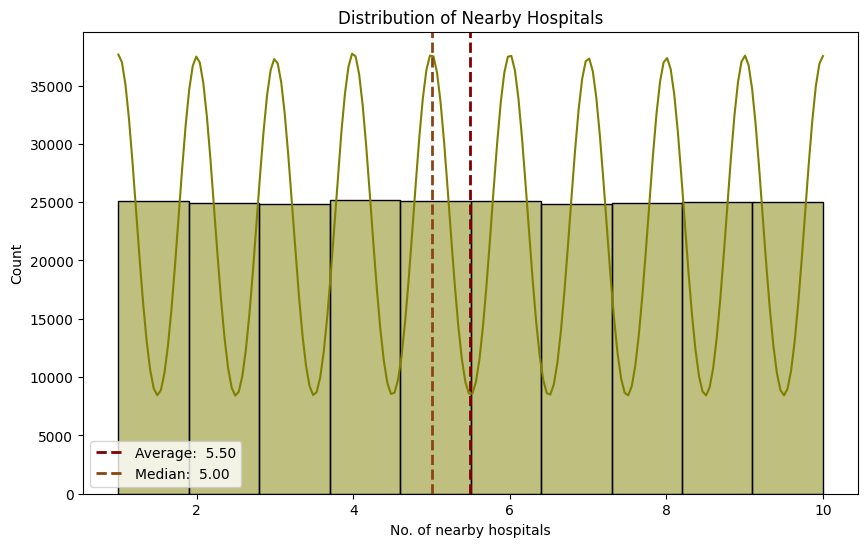

In [23]:
print("Skewness:",skew(df['Nearby_Hospitals']))
print("Kurtosis:",kurtosis(df['Nearby_Hospitals']))
plt.figure(figsize=(10,6))
sns.histplot(df['Nearby_Hospitals'],bins=10,edgecolor='black',color='olive',kde=True)
plt.axvline(df['Nearby_Hospitals'].mean(),linestyle='--',linewidth=2,color='maroon',label=f"Average: {df['Nearby_Hospitals'].mean(): .2f}")
plt.axvline(df['Nearby_Hospitals'].median(),linestyle='--',linewidth=2,color='saddlebrown',label=f"Median: {df['Nearby_Hospitals'].median(): .2f}")
plt.title('Distribution of Nearby Hospitals')
plt.legend()
plt.xlabel('No. of nearby hospitals')
plt.show()

Insights:
- The average number of nearby hospitals are 5.50.
- The median number of nearby hospitals are 5.
- The data is slightly right skewed as the skewness is positive, and the average number is slightly greater than the median.
- The data is platykurtic as the kurtosis value is less than 0, which shows that outliers are less frequent.
- Lots of properties listed in the dataset have higher number of nearby hospitals which is the reason the data is slightly skewed towards the right.

XIV. Visualising the distribution of properties as per their Public Transport Accessibility- Pie Chart.

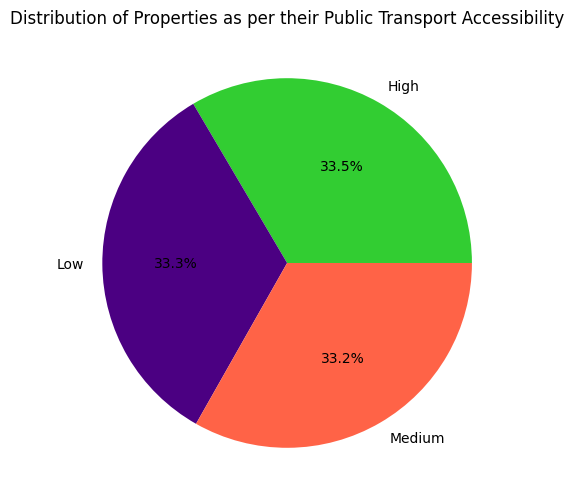

In [24]:
plt.figure(figsize=(8,6))
plt.pie(df['Public_Transport_Accessibility'].value_counts().values,labels=df['Public_Transport_Accessibility'].value_counts().index,colors=['limegreen','indigo','tomato'],autopct='%1.1f%%')
plt.title('Distribution of Properties as per their Public Transport Accessibility')
plt.show()

Insights:
- Most properties have higher accessibility to public transportation.

XV. Visualising the distribution of parking space availability across properties- Pie Chart.

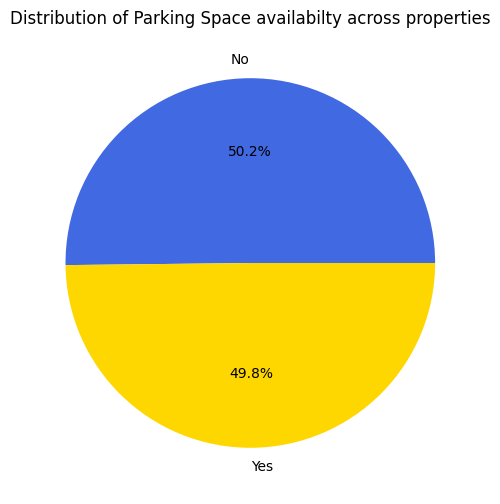

In [25]:
plt.figure(figsize=(8,6))
plt.pie(df['Parking_Space'].value_counts().values,labels=df['Parking_Space'].value_counts().index,colors=['royalblue','gold'],autopct='%1.1f%%')
plt.title('Distribution of Parking Space availabilty across properties')
plt.show()

Insights:
- A lower ratio of properties have parking spaces available for their residents.

XVI. Visualising the distribution of security across properties- Pie Chart.

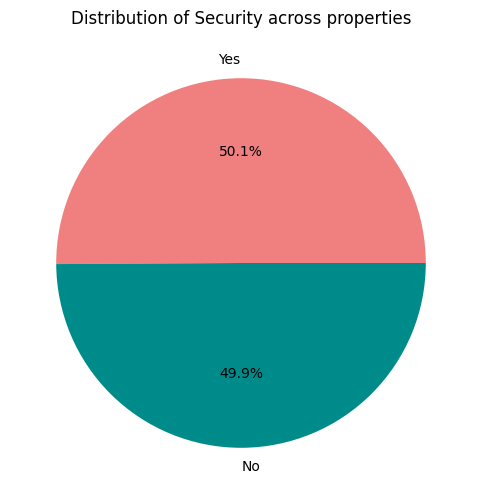

In [26]:
plt.figure(figsize=(8,6))
plt.pie(df['Security'].value_counts().values,labels=df['Security'].value_counts().index,colors=['lightcoral','darkcyan'],autopct='%1.1f%%')
plt.title('Distribution of Security across properties')
plt.show()

Insights:
- Majority of the properties listed have proper security.

XVII. Visualising the distribution of properties as per the direction they are facing- Pie Chart.

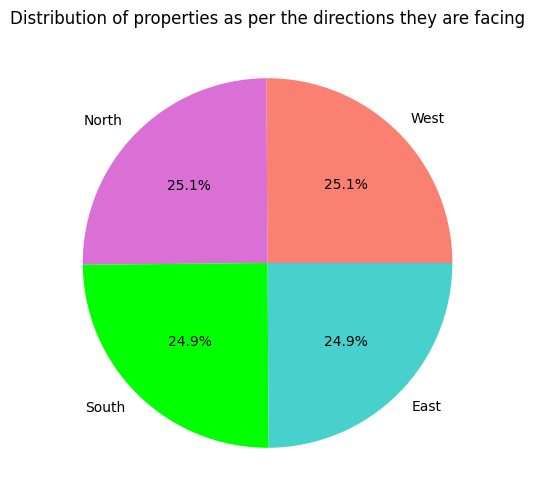

In [27]:
plt.figure(figsize=(8,6))
plt.pie(df['Facing'].value_counts().values,labels=df['Facing'].value_counts().index,colors=['salmon','orchid','lime','mediumturquoise'],autopct='%1.1f%%')
plt.title('Distribution of properties as per the directions they are facing')
plt.show()

Insights:
- North and West facing properties have the highest ratio.

XVIII. Visualising the distribution of properties by Owner Type- Pie Chart.

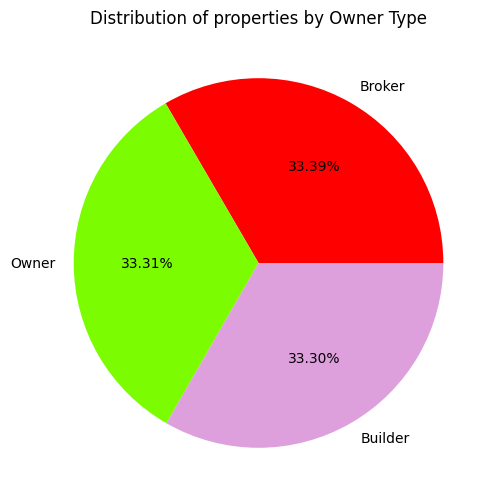

In [28]:
plt.figure(figsize=(8,6))
plt.pie(df['Owner_Type'].value_counts().values,labels=df['Owner_Type'].value_counts().index,colors=['red','lawngreen','plum'],autopct='%1.2f%%')
plt.title('Distribution of properties by Owner Type')
plt.show()

Insights:
- A slightly higher ratio of properties are owned by Brokers.

XIX. Visualising the distribution of properties as per their Availabilty Status- Pie Chart.

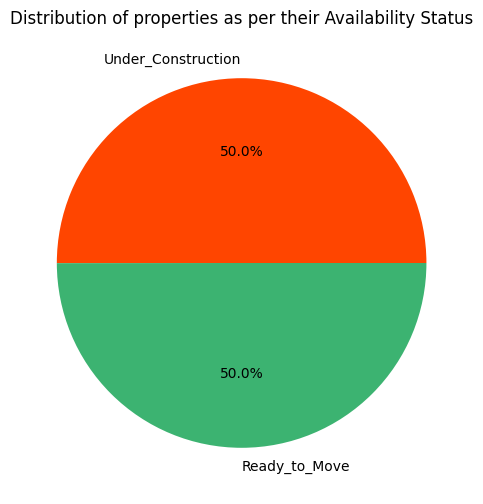

In [29]:
plt.figure(figsize=(8,6))
plt.pie(df['Availability_Status'].value_counts().values,labels=df['Availability_Status'].value_counts().index,colors=['orangered','mediumseagreen'],autopct='%1.1f%%')
plt.title('Distribution of properties as per their Availability Status')
plt.show()

Insights:
- Half the properties listed have a ready to move status, while the other half is still under construction.

Before visualising the distribution of amenities, we will one-hot encode each row of that column because most rows have multi labels and therefore it becomes necessary that we make separate columns for each amenity, which would also help us in the analysis later on.

In [30]:
# Removing spaces
df['Amenities_clean']=df['Amenities'].str.replace(' ','',regex=False)

# Creating dummy columns
amenities_dummies=df['Amenities_clean'].str.get_dummies(sep=',')

# Joining amenities_dummies to the main dataframe
df=df.drop(columns=['Amenities','Amenities_clean'])
df=pd.concat([df,amenities_dummies],axis=1)

In [31]:
# Checking the columns of the dataframe
df.head(10)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Clubhouse,Garden,Gym,Playground,Pool
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,West,Owner,Ready_to_Move,1,1,1,1,1
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,North,Builder,Under_Construction,1,1,1,1,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,South,Broker,Ready_to_Move,1,0,1,1,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,North,Builder,Ready_to_Move,1,1,1,1,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,East,Builder,Ready_to_Move,1,1,1,1,1
5,6,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,Semi-furnished,27,1,5,7,7,Low,Yes,Yes,West,Broker,Ready_to_Move,1,0,0,1,0
6,7,Tamil Nadu,Coimbatore,Locality_254,Independent House,3,4826,318.12,0.07,2016,Furnished,16,5,9,3,6,High,No,Yes,North,Builder,Under_Construction,1,1,0,1,0
7,8,Chhattisgarh,Bilaspur,Locality_490,Independent House,5,4252,141.39,0.03,2021,Unfurnished,24,4,4,10,10,High,Yes,Yes,North,Builder,Under_Construction,1,0,1,1,1
8,9,Delhi,New Delhi,Locality_232,Villa,4,2678,189.16,0.07,2003,Semi-furnished,23,16,22,7,5,Low,No,Yes,South,Broker,Under_Construction,1,1,0,1,0
9,10,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,Unfurnished,6,13,14,3,3,High,Yes,No,East,Owner,Ready_to_Move,1,1,1,1,0


In [32]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

XX. Visualisation of the distribution of each amenity across properties- Column Graph.

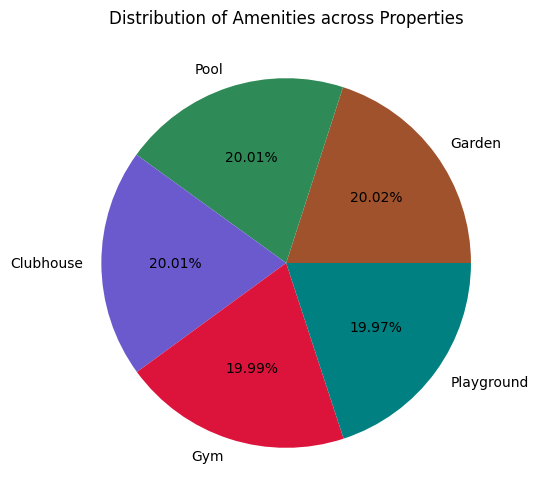

In [33]:
# Counting how many properties have each amenity
amenity_counts=amenities_dummies.sum().sort_values(ascending=False)

#Plotting the graph
plt.figure(figsize=(10,6))
plt.pie(amenity_counts.values,labels=amenity_counts.index,colors=['sienna','seagreen','slateblue','crimson','teal'],autopct='%0.2f%%')
plt.title('Distribution of Amenities across Properties')
plt.show()

Insights:
- The five amenities are almost equally distributed across the properties.
- The ratio of Garden being available as an amenity is slightly higher than the rest, followed closely by Clubhouse and Pool.

XXI. Visualising how Price per sq. ft. vary by Property Type- Boxplot.

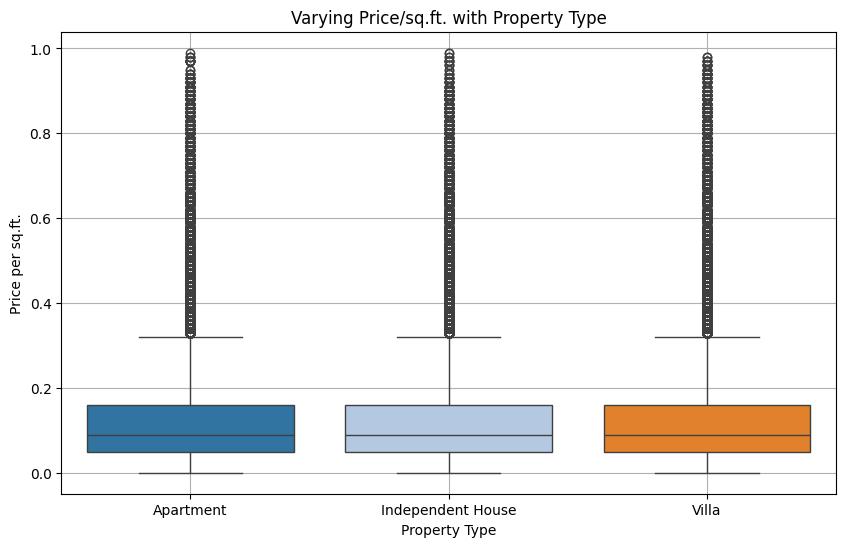

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x=df['Property_Type'],y=df['Price_per_SqFt'],palette='tab20')
plt.title('Varying Price/sq.ft. with Property Type')
plt.xlabel('Property Type')
plt.grid()
plt.ylabel('Price per sq.ft.')
plt.show()

Insights:
- Apartments have the highest number of outliers with high price per sq.ft.

XXII. Visualising the relationship between the Property Size and Price- Line Plot.

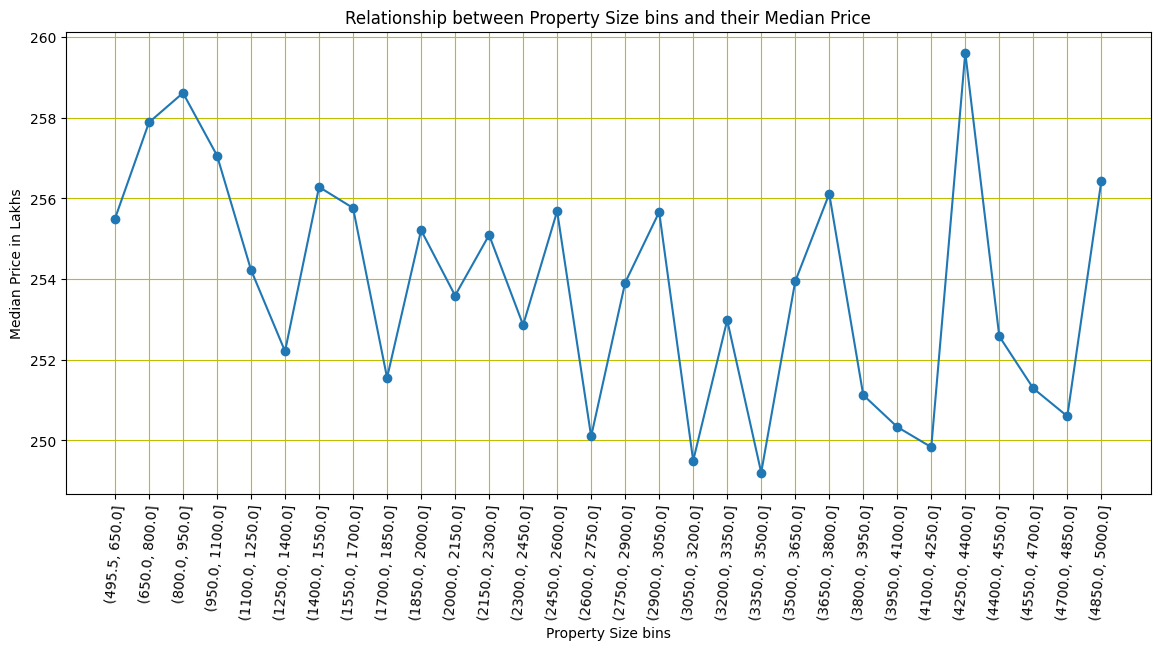

In [35]:
# Calculating median property prices for 30 size bins to reveal trend
df['size_bin']=pd.cut(df['Size_in_SqFt'],bins=30)
trend=df.groupby('size_bin')['Price_in_Lakhs'].median().reset_index()

# Plotting the graph
plt.figure(figsize=(14,6))
plt.plot(trend['size_bin'].astype(str),trend['Price_in_Lakhs'],marker='o')
plt.xticks(rotation=85)
plt.title('Relationship between Property Size bins and their Median Price')
plt.xlabel('Property Size bins')
plt.ylabel('Median Price in Lakhs')
plt.grid(color='y')
plt.show()

Insights:
- Bigger properties are not consistently priced higher.
- Each size bins contains both premium and cheap properties.
- Non-linear relationship shows that other factors (locality, city, nearby schools and hospitals, etc.) are affecting the price.

XXIII. Visualising the average Property Prices across different States- Line Plot.

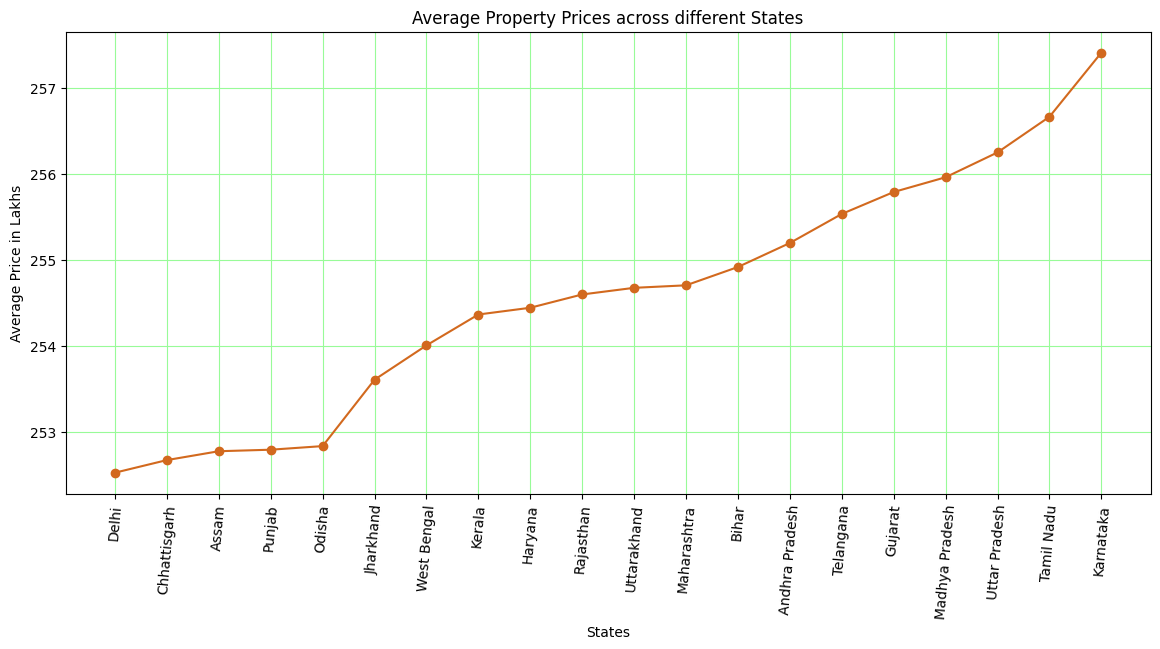

In [36]:
state_trend=df.groupby('State')['Price_in_Lakhs'].mean().reset_index().sort_values('Price_in_Lakhs')

plt.figure(figsize=(14,6))
plt.plot(state_trend['State'].astype(str),state_trend['Price_in_Lakhs'],marker='o',color='chocolate')
plt.xticks(rotation=85)
plt.title('Average Property Prices across different States')
plt.xlabel('States')
plt.ylabel('Average Price in Lakhs')
plt.grid(color='palegreen')
plt.show()

Insights:
- All the states have properties with average prices between 252-258 lakhs, showing that no state have dramatically cheaper or expensive property listings.
- Karnataka, Tamil Nadu and Uttar Pradesh have slightly higher range of average prices.

XXIV. Visualising the average Price per sq.ft. across different States- Line Plot.

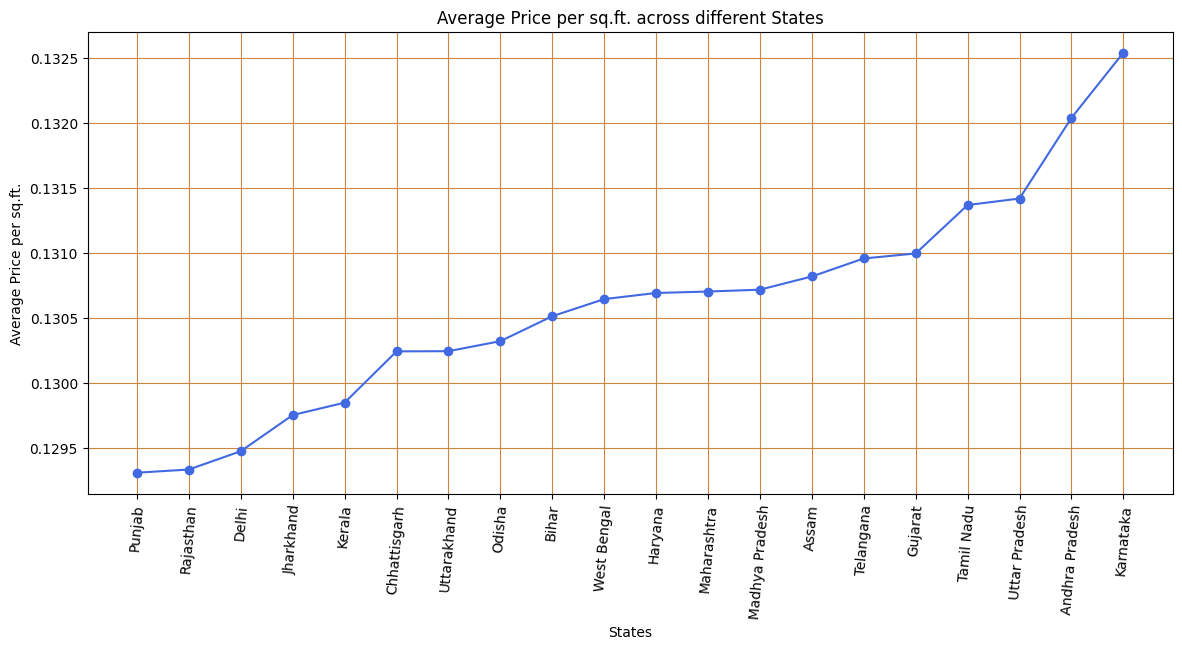

In [37]:
statetrend=df.groupby('State')['Price_per_SqFt'].mean().reset_index().sort_values('Price_per_SqFt')

plt.figure(figsize=(14,6))
plt.plot(statetrend['State'].astype(str),statetrend['Price_per_SqFt'],marker='o',color='royalblue')
plt.xticks(rotation=85)
plt.title('Average Price per sq.ft. across different States')
plt.xlabel('States')
plt.ylabel('Average Price per sq.ft.')
plt.grid(color='peru')
plt.show()

Insights:
- Just like the graph above, the average price per sq.ft. across all states is almost same, suggesting finer-level factors might be important for the pricing of properties.
- Karnataka, Andhra Pradesh and Uttar Pradesh have slightly higher range of average price per sq.ft.

XXV. Visualising the Top 10 Cities by Average Property Price- Line Plot.

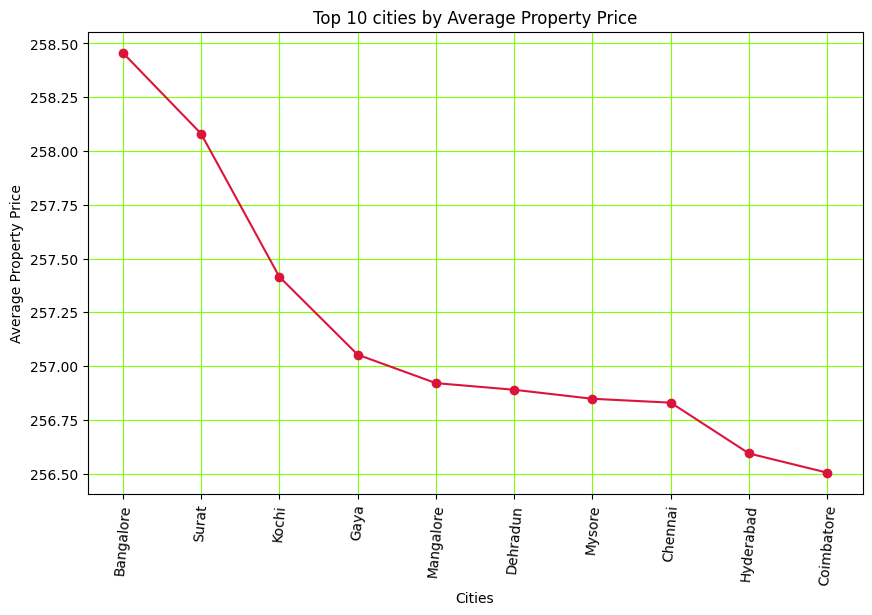

In [38]:
city_trend=df.groupby('City')['Price_in_Lakhs'].mean().reset_index().sort_values('Price_in_Lakhs',ascending=False)
city_trend_count=city_trend.head(10)

plt.figure(figsize=(10,6))
plt.plot(city_trend_count['City'].astype(str),city_trend_count['Price_in_Lakhs'],color='crimson',marker='o')
plt.xticks(rotation=85)
plt.grid(color='chartreuse')
plt.title('Top 10 cities by Average Property Price')
plt.xlabel('Cities')
plt.ylabel('Average Property Price')
plt.show()

Insights:
- The average prices of properties of the top 10 cities differ by a very small margin.
- Bangalore, Surat and Kochi have slightly higher range of average prices.

XXVI. Visualising the Top 10 Cities by Average Price per sq.ft.- Line Plot.

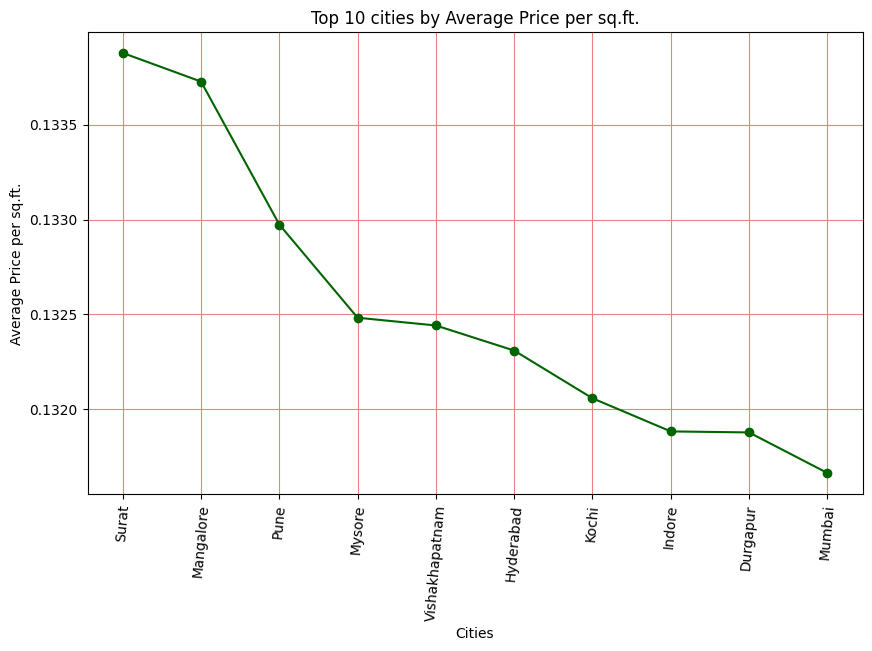

In [39]:
citytrend=df.groupby('City')['Price_per_SqFt'].mean().reset_index().sort_values('Price_per_SqFt',ascending=False)
citytrend_count=citytrend.head(10)

plt.figure(figsize=(10,6))
plt.plot(citytrend_count['City'].astype(str),citytrend_count['Price_per_SqFt'],color='darkgreen',marker='o')
plt.xticks(rotation=85)
plt.grid(color='lightcoral')
plt.title('Top 10 cities by Average Price per sq.ft.')
plt.xlabel('Cities')
plt.ylabel('Average Price per sq.ft.')
plt.show()

Insights:
- The average price per sq.ft. of the top 10 cities differ by a very small margin.
- Surat, Mangalore and Pune have slightly higher range of average price per sq.ft.

XXVII. Visualising the Top 10 localities by Mean and Median Age of Properties- Line Plot.

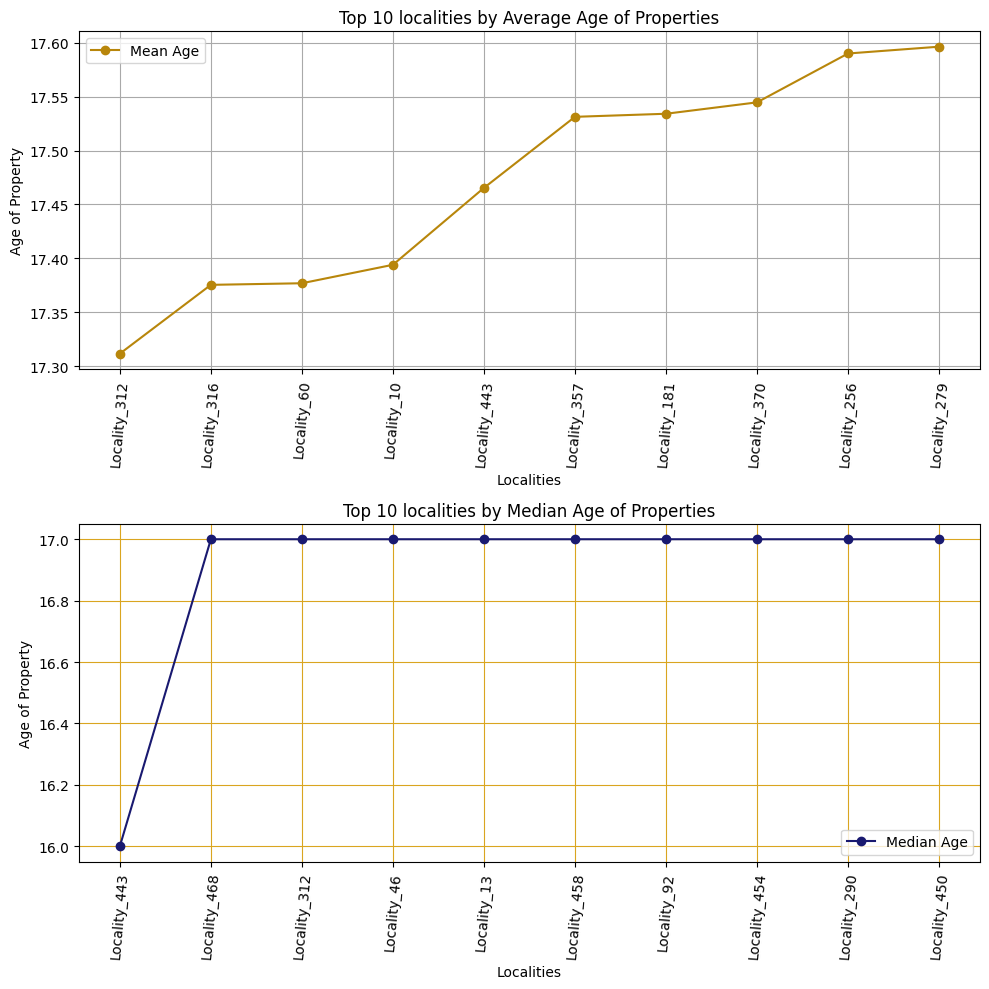

In [40]:
mean_loc_trend=df.groupby('Locality')['Age_of_Property'].mean().reset_index().sort_values('Age_of_Property')
median_loc_trend=df.groupby('Locality')['Age_of_Property'].median().reset_index().sort_values('Age_of_Property')
mean_loc_count=mean_loc_trend.head(10)
median_loc_count=median_loc_trend.head(10)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(mean_loc_count['Locality'].astype(str),mean_loc_count['Age_of_Property'],color='darkgoldenrod',marker='o',label='Mean Age')
plt.grid(color='darkgray')
plt.xticks(rotation=85)
plt.legend()
plt.title('Top 10 localities by Average Age of Properties')
plt.xlabel('Localities')
plt.ylabel('Age of Property')

plt.subplot(2,1,2)
plt.plot(median_loc_count['Locality'].astype(str),median_loc_count['Age_of_Property'],color='midnightblue',marker='o',label='Median Age')
plt.grid(color='goldenrod')
plt.xticks(rotation=85)
plt.legend()
plt.title('Top 10 localities by Median Age of Properties')
plt.xlabel('Localities')
plt.ylabel('Age of Property')
plt.tight_layout()
plt.show()

Insights:
- Across the top 10 localities, both the mean and median ages of properties are around 17 years.
- Both older and younger properties are evenly distributed among these localities.

XXVIII. Visualising the Average Price per sq.ft. of each BHK of different Age Groups of properties- Line Plot.

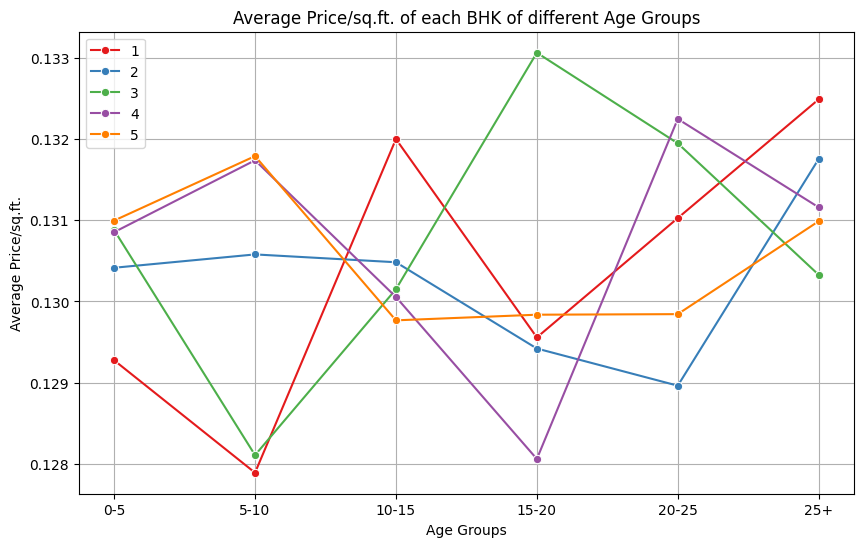

In [41]:
df['age_bin']=pd.cut(df['Age_of_Property'],bins=[5,10,15,20,25,30,100],labels=['0-5','5-10','10-15','15-20','20-25','25+'])
age_bhk=df.groupby(['age_bin','BHK'])['Price_per_SqFt'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=age_bhk,x='age_bin',y='Price_per_SqFt',hue='BHK',marker='o',palette='Set1')
plt.title('Average Price/sq.ft. of each BHK of different Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Average Price/sq.ft.')
plt.grid()
plt.legend()
plt.show()

Insights:
- 1 BHK properties of age group 5-10 years are the least expensive.
- 3 BHK properties of age group 15-20 years are the most expensive.
- Older properties are not always cheaper, while newer properties are not always more expensive.

XXIX. Visualising the Top 5 Most expensive localities- Line Plot.

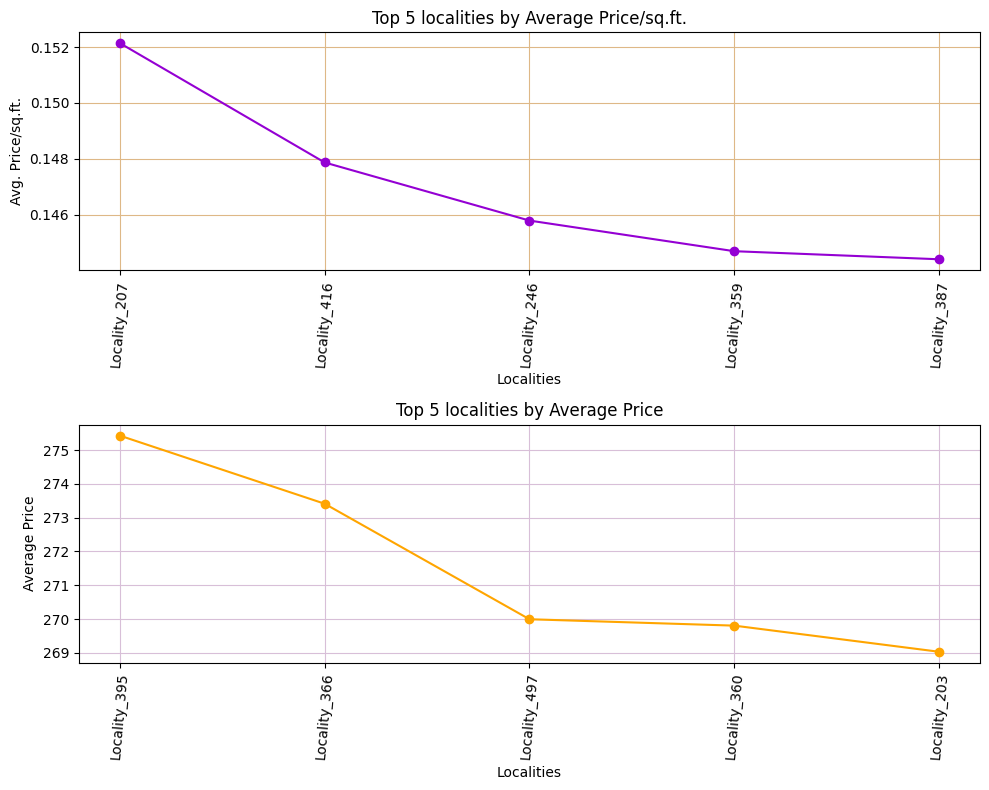

In [42]:
norm_loc_trend=df.groupby('Locality')['Price_per_SqFt'].mean().reset_index().sort_values('Price_per_SqFt',ascending=False)
top5_norm_loc=norm_loc_trend.head(5)
price_loc_trend=df.groupby('Locality')['Price_in_Lakhs'].mean().reset_index().sort_values('Price_in_Lakhs',ascending=False)
top5_price_loc=price_loc_trend.head(5)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(top5_norm_loc['Locality'].astype(str),top5_norm_loc['Price_per_SqFt'],color='darkviolet',marker='o')
plt.grid(color='burlywood')
plt.xticks(rotation=85)
plt.title('Top 5 localities by Average Price/sq.ft.')
plt.xlabel('Localities')
plt.ylabel('Avg. Price/sq.ft.')

plt.subplot(2,1,2)
plt.plot(top5_price_loc['Locality'].astype(str),top5_price_loc['Price_in_Lakhs'],color='orange',marker='o')
plt.grid(color='thistle')
plt.xticks(rotation=85)
plt.title('Top 5 localities by Average Price')
plt.xlabel('Localities')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

Insights:
- Locality 207 has the highest price per sq.ft., indicating that it is the costliest locality in terms of space, even though other loclities may have a higher total property prices.
- Locality 395 has the highest average property price.

XXX. Visualising how Nearby Schools relate to Price per sq.ft.- Line Plot.

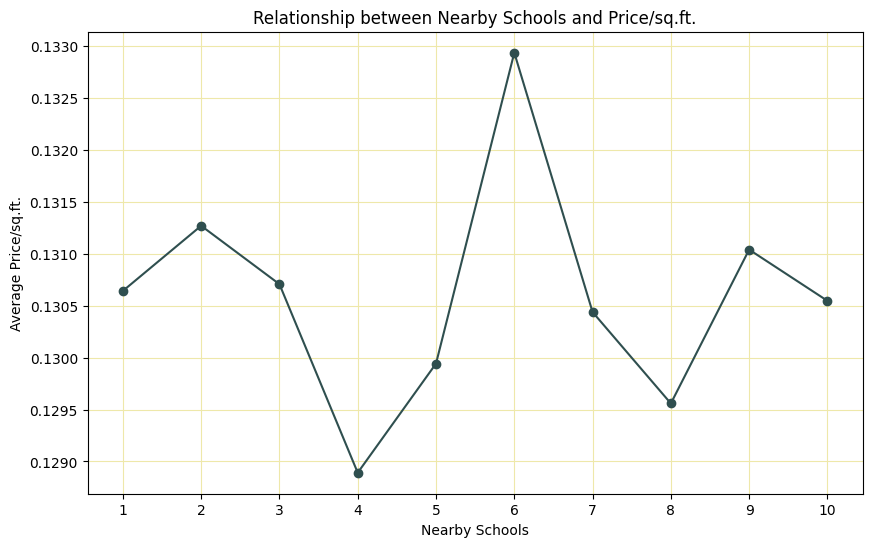

In [43]:
scl_rate=df.groupby('Nearby_Schools')['Price_per_SqFt'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(scl_rate['Nearby_Schools'].astype(str),scl_rate['Price_per_SqFt'],color='darkslategray',marker='o')
plt.grid(color='palegoldenrod')
plt.title('Relationship between Nearby Schools and Price/sq.ft.')
plt.xlabel('Nearby Schools')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- Higher number of nearby schools doesn't necessarily increase the price per sq.ft.
- Moderate school density may be, the most attractive or correlated with high-quality neighbourhoods.

XXXI. Visualising how Nearby Hospitals relate to Price per sq.ft.- Line Plot.

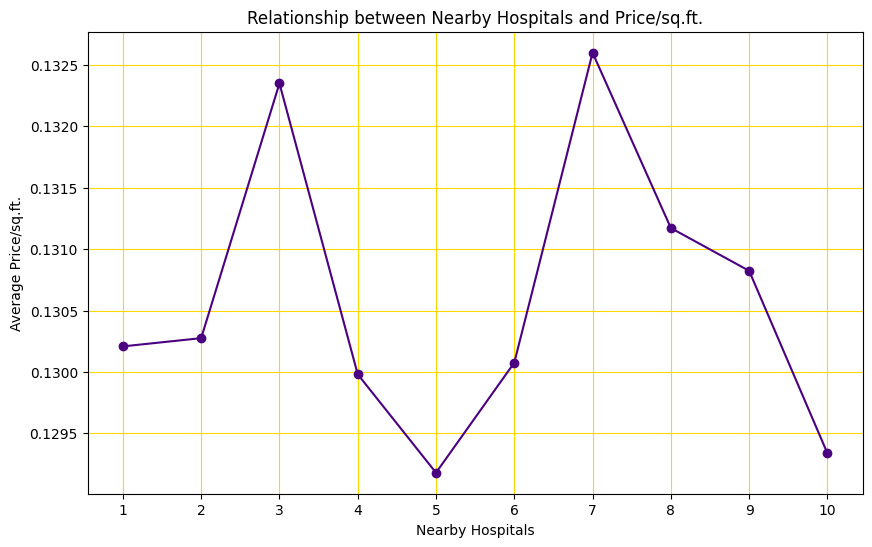

In [44]:
scl_rate=df.groupby('Nearby_Hospitals')['Price_per_SqFt'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(scl_rate['Nearby_Hospitals'].astype(str),scl_rate['Price_per_SqFt'],color='indigo',marker='o')
plt.grid(color='gold')
plt.title('Relationship between Nearby Hospitals and Price/sq.ft.')
plt.xlabel('Nearby Hospitals')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- Localities with around 3 and 7 nearby hospitals show higher average price per sq.ft., suggesting moderate concentration of medical facilities is associated with premium pricing.

XXXII. Visualising how each Furnished Status affect Property Prices- Line Plot.

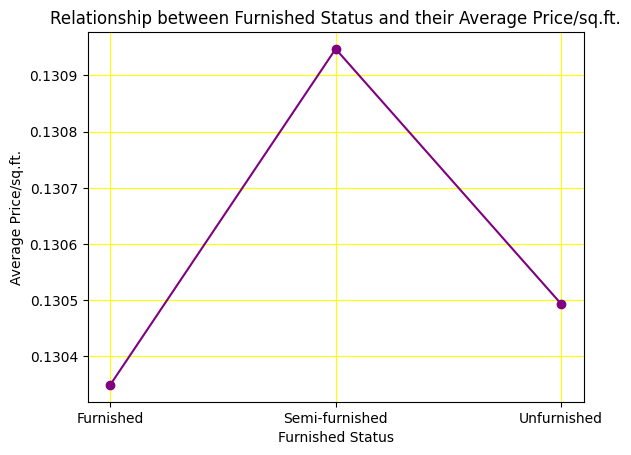

In [45]:
prop_trend=df.groupby('Furnished_Status')['Price_per_SqFt'].mean().reset_index()

plt.plot(prop_trend['Furnished_Status'].astype(str),prop_trend['Price_per_SqFt'],color='purple',marker='o')
plt.grid(color='yellow')
plt.title('Relationship between Furnished Status and their Average Price/sq.ft.')
plt.xlabel('Furnished Status')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- On an average, semi-furnished properties are priced slightly higher than the other two categories.
- This shows, that a higher ratio of premium properties are semi-furnished.

XXXIII. Visualising how Price per sq.ft. vary by Property Facing Direction- Line Plot.

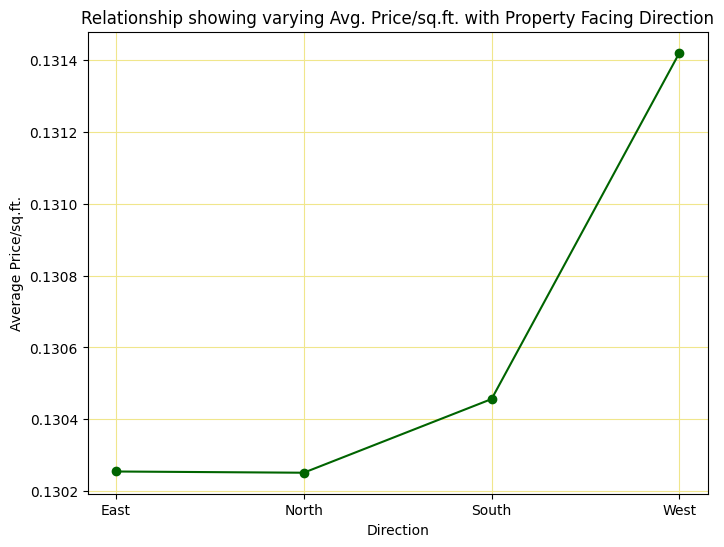

In [46]:
face_trend=df.groupby('Facing')['Price_per_SqFt'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(face_trend['Facing'].astype(str),face_trend['Price_per_SqFt'],color='darkgreen',marker='o')
plt.grid(color='khaki')
plt.title('Relationship showing varying Avg. Price/sq.ft. with Property Facing Direction')
plt.xlabel('Direction')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- Average price per sq.ft. does not vary by a lot with different facing directions.
- Although, properties facing West are priced slightly higher than the rest.

XXXIV. Visualising how Properties are priced as per their Owner types- Line Plot.

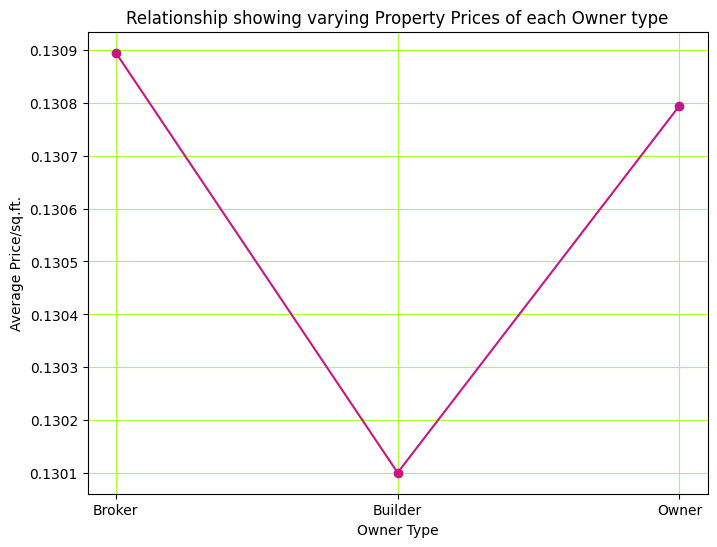

In [47]:
owner_trend=df.groupby('Owner_Type')['Price_per_SqFt'].mean().reset_index()

plt.figure(figsize=(8,6))
plt.plot(owner_trend['Owner_Type'].astype(str),owner_trend['Price_per_SqFt'],color='mediumvioletred',marker='o')
plt.grid(color='greenyellow')
plt.title('Relationship showing varying Property Prices of each Owner type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- Even though the price differences are very narrow, the graph shows that premium properties are mostly marketed through Brokers and Owners.

XXXV. Visualising the relationship between Property Price/sq.ft. and their Availabilty status- Line Plot.

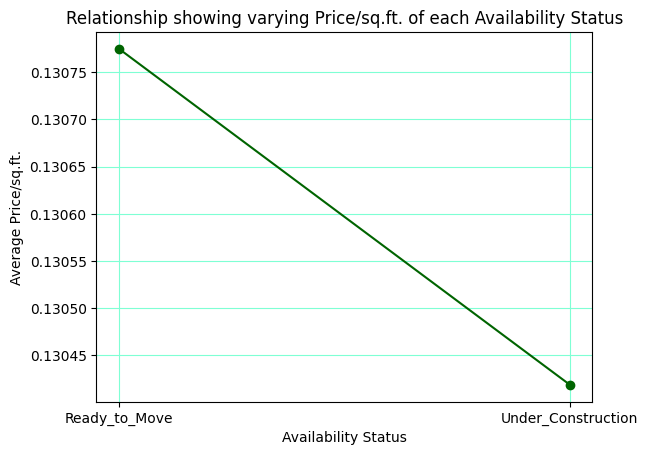

In [48]:
ava_trend=df.groupby('Availability_Status')['Price_per_SqFt'].mean().reset_index()

plt.plot(ava_trend['Availability_Status'].astype(str),ava_trend['Price_per_SqFt'],color='darkgreen',marker='o')
plt.grid(color='aquamarine')
plt.title('Relationship showing varying Price/sq.ft. of each Availability Status')
plt.xlabel('Availability Status')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Imsights:
- Ready to move properties are priced slightly higher than properties under construction.

XXXVI. Visualising Properties of different Availability Status under different Owner Types- Heatmap.

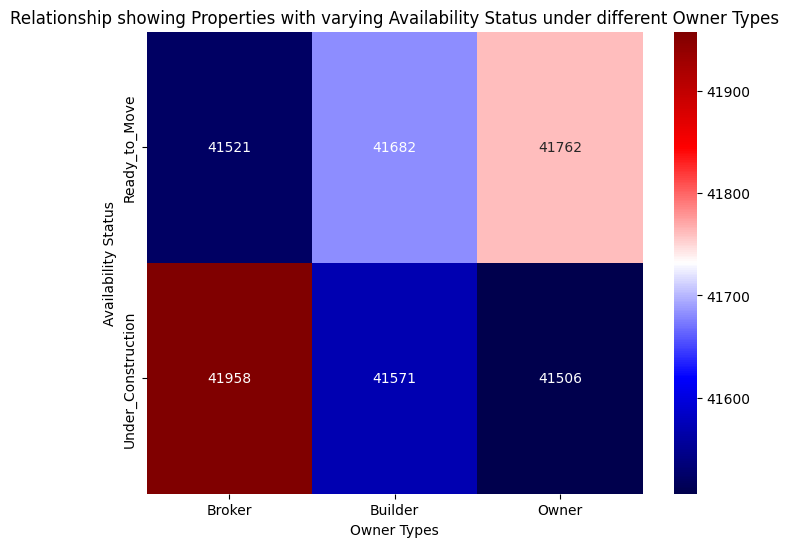

In [49]:
ct=pd.crosstab(df['Availability_Status'],df['Owner_Type'])

plt.figure(figsize=(8,6))
sns.heatmap(ct,annot=True,cmap='seismic',fmt='d')
plt.title('Relationship showing Properties with varying Availability Status under different Owner Types')
plt.xlabel('Owner Types')
plt.ylabel('Availability Status')
plt.show()

Insights:
- Broker holds the highest number of Under Construction properties, while Owner holds the least.
- Owner holds the highest number of properties that are Ready to Move, while Broker holds the least.

XXXVII. Visualising how Parking Space availability affect Price/sq.ft.- Line Plot.

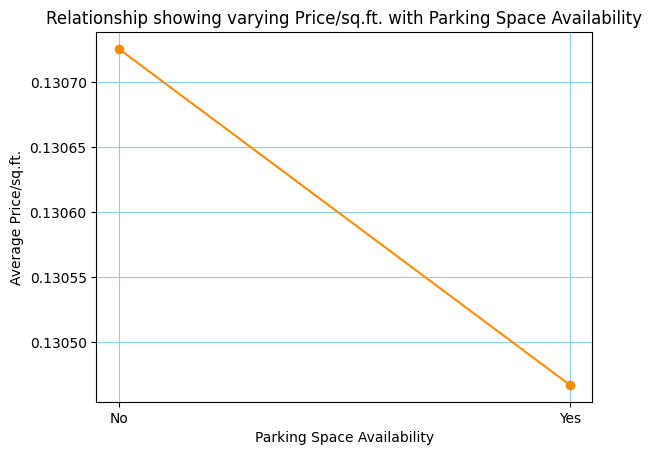

In [50]:
park_trend=df.groupby('Parking_Space')['Price_per_SqFt'].mean().reset_index()

plt.plot(park_trend['Parking_Space'].astype(str),park_trend['Price_per_SqFt'],color='darkorange',marker='o')
plt.grid(color='lightskyblue')
plt.title('Relationship showing varying Price/sq.ft. with Parking Space Availability')
plt.xlabel('Parking Space Availability')
plt.ylabel('Average Price/sq.ft.')
plt.show()

Insights:
- Although the difference is very small, properties priced slightly higher don't come with any Parking Space.
- The trend shows that some higher priced properties are located in areas where land prices are costly and parking is limited.

XXXVIII. Visualising how properties are priced according to the amenities offered- Line Plot.

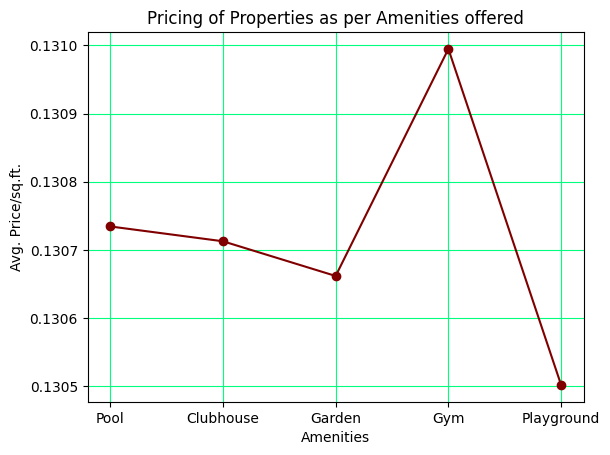

In [51]:
amenity_cols=['Pool','Clubhouse','Garden','Gym','Playground']

avg_pps_amnt={col:df[df[col]==1]['Price_per_SqFt'].mean() for col in amenity_cols}

amenities=list(avg_pps_amnt.keys())
avg_pps=list(avg_pps_amnt.values())

plt.plot(amenities,avg_pps,marker='o',color='maroon')
plt.grid(color='springgreen')
plt.title('Pricing of Properties as per Amenities offered')
plt.xlabel('Amenities')
plt.ylabel('Avg. Price/sq.ft.')
plt.show()

Insights:
- Properties with gym have a higher average price per sq.ft.
- Properties with a playground have the lowest Average price per sq. ft.

XXXIX. Visualising how Properties of different Ages are related to Amenities available- Line Plot.

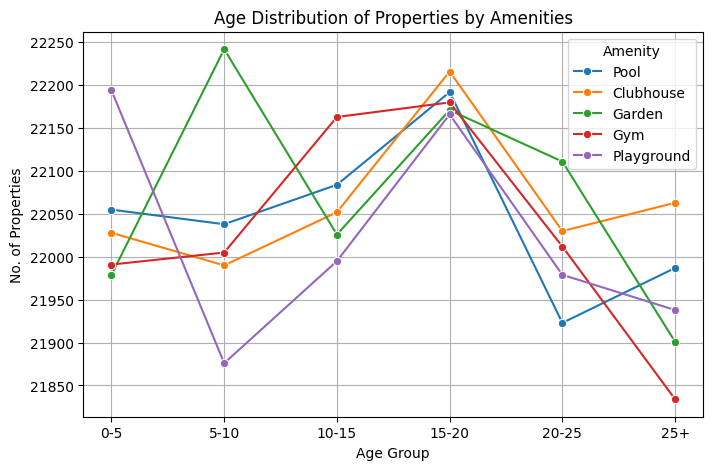

In [52]:
rows=[]
for a in amenity_cols:
    counts=df[df[a]==1]['age_bin'].value_counts().sort_index()
    rows.append(pd.DataFrame({'Age group':counts.index,'Amenity':a,'Count':counts.values}))
age_amenity=pd.concat(rows,ignore_index=True)

plt.figure(figsize=(8,5))
sns.lineplot(data=age_amenity,x='Age group',y='Count',hue='Amenity',marker='o')
plt.xlabel('Age Group')
plt.ylabel('No. of Properties')
plt.title('Age Distribution of Properties by Amenities')
plt.grid()
plt.show()

Insights:
- Most amenities are heavily concentrated in the age group of 15-20 years.

XL. Visualising how Public Transportation Accessibility affects Price per sq.ft.- Line Plot.

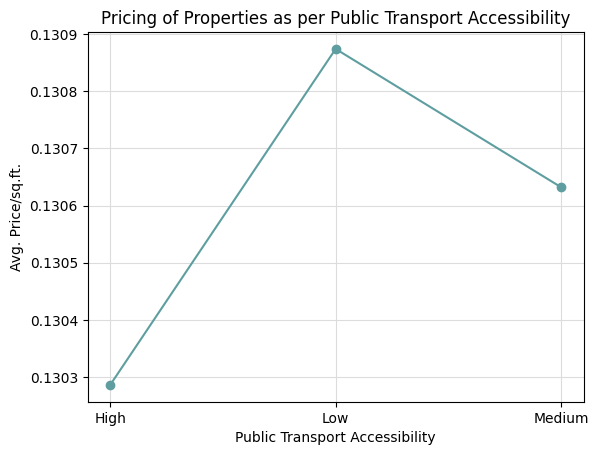

In [53]:
pta_trend=df.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean().reset_index()

plt.plot(pta_trend['Public_Transport_Accessibility'],pta_trend['Price_per_SqFt'],marker='o',color='cadetblue')
plt.grid(color='gainsboro')
plt.title('Pricing of Properties as per Public Transport Accessibility')
plt.xlabel('Public Transport Accessibility')
plt.ylabel('Avg. Price/sq.ft.')
plt.show()

Insights:
- Properties in areas of low public transport accessibility have a higher average price per sq.ft.
- The trend suggests that premium properties may be clustered in areas that are more exclusive, possibly with less transit-served locations.

XLI. Visualising how Security Provision affects Price per sq.ft.- Line Plot.

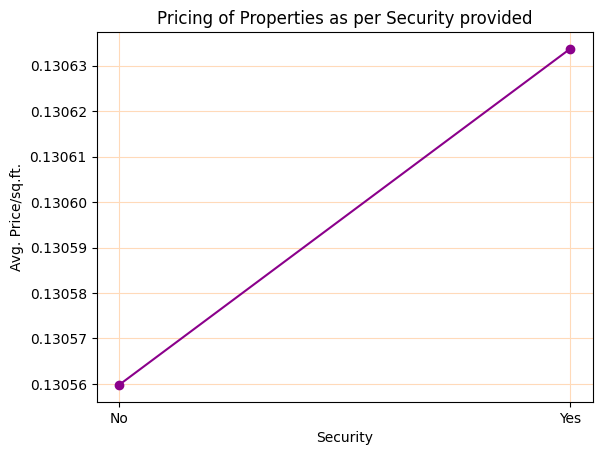

In [54]:
sec_trend=df.groupby('Security')['Price_per_SqFt'].mean().reset_index()

plt.plot(sec_trend['Security'],sec_trend['Price_per_SqFt'],marker='o',color='darkmagenta')
plt.grid(color='peachpuff')
plt.title('Pricing of Properties as per Security provided')
plt.xlabel('Security')
plt.ylabel('Avg. Price/sq.ft.')
plt.show()

Insights:
- Properties with security have a higher average price per sq.ft.
- The trend shows that security provision is directly related with the price of a property, therefore this is a value adding feature.

XLII. Visualising the relationship between all the numeric columns- Pair plot.

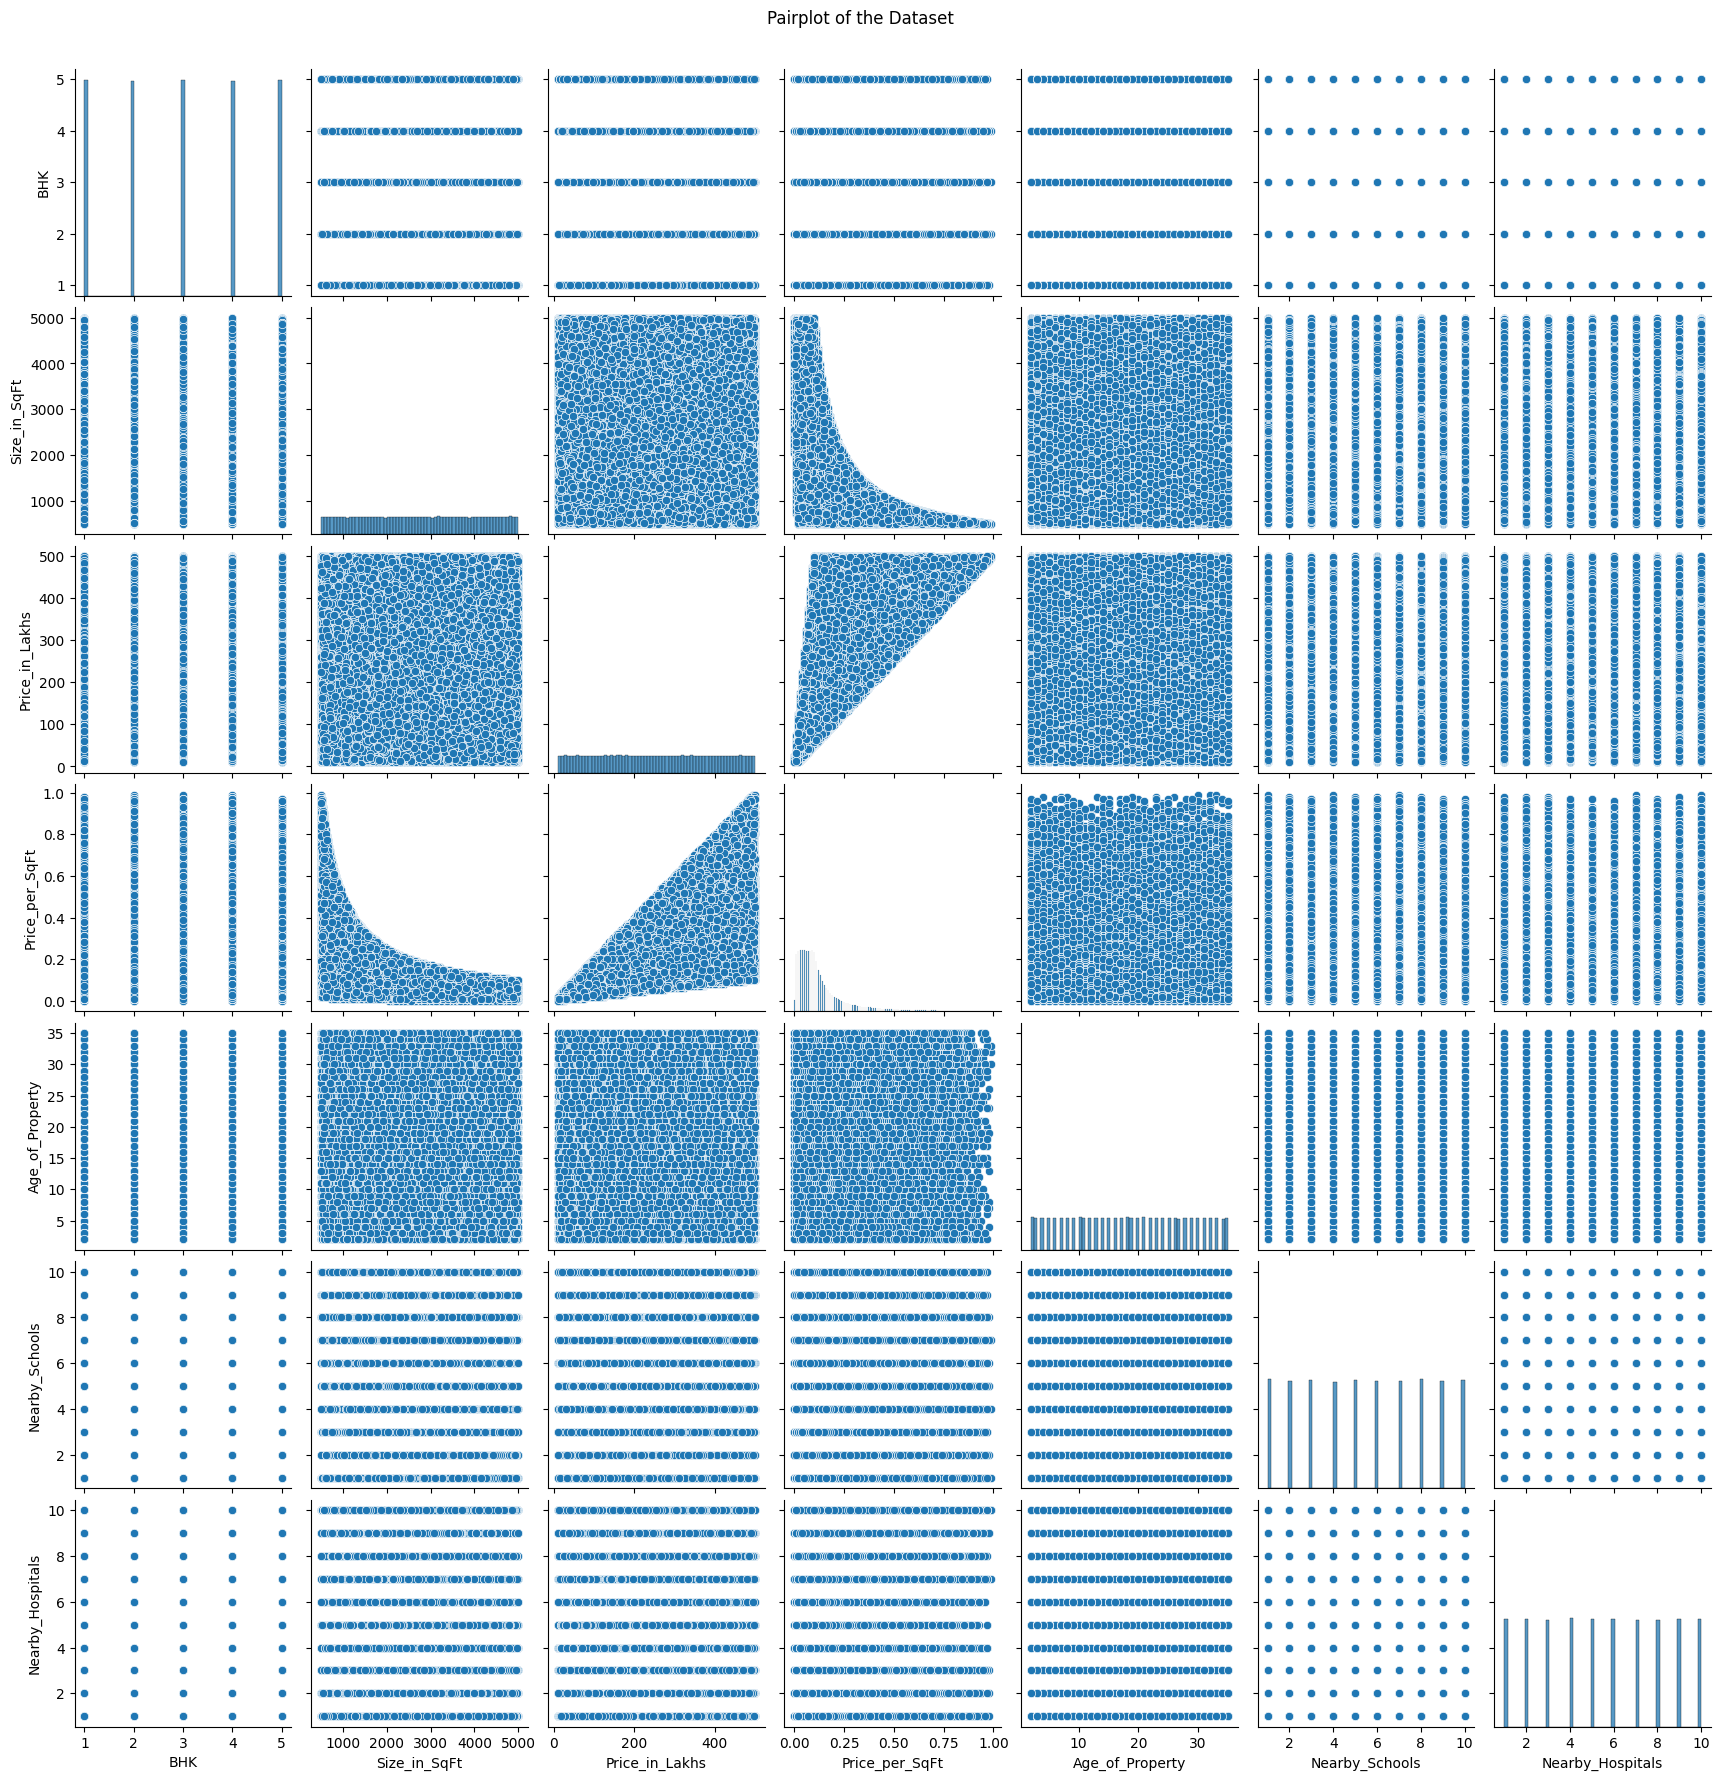

In [55]:
dfc=df.drop(columns=['size_bin','age_bin','Floor_No','Total_Floors','ID','Year_Built','Pool','Clubhouse','Garden','Gym','Playground'])
sns.pairplot(dfc)
plt.suptitle('Pairplot of the Dataset',y=1.02)
plt.show()

In [56]:
# Checking the final shape of the dataset
df.shape

(250000, 29)

In [57]:
# Checking the dataset columns
df.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Facing', 'Owner_Type',
       'Availability_Status', 'Clubhouse', 'Garden', 'Gym', 'Playground',
       'Pool', 'size_bin', 'age_bin'],
      dtype='object')

In [58]:
# Removing columns that we will not be using further
dfd=df.drop(columns=['Floor_No','Total_Floors','ID','age_bin','size_bin'])
dfd.columns

Index(['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Facing',
       'Owner_Type', 'Availability_Status', 'Clubhouse', 'Garden', 'Gym',
       'Playground', 'Pool'],
      dtype='object')

5. Appreciation rate Computation-
    Feature Engineering Summary:

    - Size Score-
        
        Computed using percentile rank of property area.
        
        Formula:    size_score=size_pct-0.5


    - BHK Score-
        
        Based on number of bedrooms.
        
        Formula:    bhk_score=BHK/100


    - Age of Property Score-
        
        Newer properties appreciate faster.
        
        Maximum property age in dataset ≈ 35 years.
        
        Formula:    age_score=(35-Age of Property)/35


    - Property Type Score-
        
        Assigned based on expected appreciation patterns:
        
        Property Type-----------------Score
        
            Apartment	              0.02
        
            Independent House	      0.04
        
            Villa	                  0.06


    - Amenities Score-

        Weighted sum of amenities:

        Pool: 1.0

        Gym: 1.0

        Clubhouse: 1.0

        Garden: 0.6

        Playground: 0.5

        Formula:    amen_score=amen_raw/4.1


    - Parking Score-

        Yes: 0.02

        No: 0.0


    - Security Score-

        Yes: 0.7

        No: 0.0


    - Availability Score-

        Ready_to_Move: 0.05

        Under_Construction: 0.0


    - Final Appreciation Rate (r)-

        The final appreciation rate is a weighted sum of all engineered scores:

            Formula: r=0.05 + 0.035*BHK_score + 0.05*size_score + 0.1*ptype_score + 0.010*amen_score + 0.008*age_score + 0.002*park_score

                       + 0.02*sec_score + 0.025*ava_score +  random noise

            Random Noise: np.random.normal(0,0.005)

            Final values are clipped to range 0.0 to 0.15

In [59]:
# Base rate
r_base=0.05

# Property Size score
dfd['size_pct']=dfd['Size_in_SqFt'].rank(pct=True)
dfd['size_score']=dfd['size_pct']-0.5

# Property Type score
ptype_map={'Apartment':0.02,'Independent House':0.04,'Villa':0.06}
dfd['ptype_score']=dfd['Property_Type'].map(ptype_map)

# Amenities score
dfd['amen_raw']=(1.0*dfd['Pool']+1.0*dfd['Clubhouse']+1.0*dfd['Gym']+0.6*dfd['Garden']+0.5*dfd['Playground'])
dfd['amen_score']=dfd['amen_raw']/4.1

# BHK score
dfd['BHK_score']=dfd['BHK']/10

#Age of Property score
dfd['age_score']=(35-dfd['Age_of_Property'])/35

# Parking score
dfd['park_score']=dfd['Parking_Space'].map({'Yes':0.02,'No':0.0})

# Security score
dfd['sec_score']=dfd['Security'].map({'Yes':0.7,'No':0.0})

# Availability score
dfd['ava_score']=dfd['Availability_Status'].map({'Ready_to_Move':0.05,'Under_Construction':0.0})

# Final Score
np.random.seed(42)
dfd['r']=(0.05+0.035*dfd['BHK_score']+0.05*dfd['size_score']+0.1*dfd['ptype_score']+0.010*dfd['amen_score']+0.008*dfd['age_score']
          +0.002*dfd['park_score']+0.02*dfd['sec_score']+0.025*dfd['ava_score']+np.random.normal(0,0.005,len(dfd)))
dfd['r']=dfd['r'].clip(0.0,0.15)
dfd.head(10)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Clubhouse,Garden,Gym,Playground,Pool,size_pct,size_score,ptype_score,amen_raw,amen_score,BHK_score,age_score,park_score,sec_score,ava_score,r
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,35,10,3,High,No,No,West,Owner,Ready_to_Move,1,1,1,1,1,0.941634,0.441634,0.02,4.1,1.000000,0.1,0.000000,0.00,0.0,0.05,0.091315
1,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,17,8,1,Low,No,Yes,North,Builder,Under_Construction,1,1,1,1,1,0.414100,-0.085900,0.04,4.1,1.000000,0.3,0.514286,0.00,0.7,0.00,0.087628
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,28,9,8,Low,Yes,No,South,Broker,Ready_to_Move,1,0,1,1,1,0.698382,0.198382,0.02,3.5,0.853659,0.2,0.200000,0.02,0.0,0.05,0.083584
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,34,5,7,High,Yes,Yes,North,Builder,Ready_to_Move,1,1,1,1,1,0.498606,-0.001394,0.04,4.1,1.000000,0.2,0.028571,0.02,0.7,0.05,0.094064
4,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,23,4,9,Low,No,Yes,East,Builder,Ready_to_Move,1,1,1,1,1,0.960552,0.460552,0.06,4.1,1.000000,0.4,0.342857,0.00,0.7,0.05,0.119850
5,West Bengal,Durgapur,Locality_246,Apartment,4,3500,135.28,0.04,2020,Semi-furnished,5,7,7,Low,Yes,Yes,West,Broker,Ready_to_Move,1,0,0,1,0,0.666588,0.166588,0.02,1.5,0.365854,0.4,0.857143,0.02,0.7,0.05,0.098964
6,Tamil Nadu,Coimbatore,Locality_254,Independent House,3,4826,318.12,0.07,2016,Furnished,9,3,6,High,No,Yes,North,Builder,Under_Construction,1,1,0,1,0,0.961212,0.461212,0.04,2.1,0.512195,0.3,0.742857,0.00,0.7,0.00,0.120521
7,Chhattisgarh,Bilaspur,Locality_490,Independent House,5,4252,141.39,0.03,2021,Unfurnished,4,10,10,High,Yes,Yes,North,Builder,Under_Construction,1,0,1,1,1,0.833080,0.333080,0.04,3.5,0.853659,0.5,0.885714,0.02,0.7,0.00,0.121653
8,Delhi,New Delhi,Locality_232,Villa,4,2678,189.16,0.07,2003,Semi-furnished,22,7,5,Low,No,Yes,South,Broker,Under_Construction,1,1,0,1,0,0.484720,-0.015280,0.06,2.1,0.512195,0.4,0.371429,0.00,0.7,0.00,0.088982
9,Jharkhand,Ranchi,Locality_122,Villa,2,1393,187.42,0.13,2011,Unfurnished,14,3,3,High,Yes,No,East,Owner,Ready_to_Move,1,1,1,1,0,0.198922,-0.301078,0.06,3.1,0.756098,0.2,0.600000,0.02,0.0,0.05,0.064310


In [60]:
dfd.tail(10)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Clubhouse,Garden,Gym,Playground,Pool,size_pct,size_score,ptype_score,amen_raw,amen_score,BHK_score,age_score,park_score,sec_score,ava_score,r
249990,Jharkhand,Ranchi,Locality_403,Villa,3,1261,307.44,0.24,2019,Semi-furnished,6,10,9,Medium,Yes,No,East,Owner,Under_Construction,1,0,0,1,0,0.169460,-0.330540,0.06,1.5,0.365854,0.3,0.828571,0.02,0.0,0.00,0.065391
249991,Haryana,Faridabad,Locality_143,Independent House,3,3277,495.99,0.15,2009,Unfurnished,16,2,6,Low,Yes,Yes,South,Builder,Under_Construction,1,1,1,1,1,0.616784,0.116784,0.04,4.1,1.000000,0.3,0.542857,0.02,0.7,0.00,0.099542
249992,Delhi,Dwarka,Locality_83,Apartment,1,3408,225.27,0.07,2003,Furnished,22,9,4,Low,Yes,Yes,East,Builder,Ready_to_Move,1,1,1,1,1,0.646248,0.146248,0.02,4.1,1.000000,0.1,0.371429,0.02,0.7,0.05,0.106326
249993,Odisha,Cuttack,Locality_280,Independent House,5,4873,79.73,0.02,1992,Semi-furnished,33,10,8,Medium,No,Yes,North,Builder,Ready_to_Move,1,1,1,0,1,0.971418,0.471418,0.04,3.6,0.878049,0.5,0.057143,0.00,0.7,0.05,0.122277
249994,Telangana,Warangal,Locality_313,Apartment,3,3020,97.98,0.03,2005,Furnished,20,5,4,Low,Yes,Yes,West,Builder,Under_Construction,1,1,0,0,1,0.560084,0.060084,0.02,2.6,0.634146,0.3,0.428571,0.02,0.7,0.00,0.081540
249995,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,Furnished,30,8,6,Low,No,No,East,Broker,Under_Construction,1,1,1,1,1,0.332154,-0.167846,0.04,4.1,1.000000,0.5,0.142857,0.00,0.0,0.00,0.067556
249996,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,Semi-furnished,12,8,10,Low,No,No,South,Broker,Ready_to_Move,0,0,0,1,0,0.398390,-0.101610,0.02,0.5,0.121951,0.1,0.657143,0.00,0.0,0.05,0.065468
249997,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,Furnished,22,10,4,High,Yes,Yes,South,Builder,Under_Construction,0,0,0,1,0,0.535856,0.035856,0.06,0.5,0.121951,0.4,0.371429,0.02,0.7,0.00,0.090715
249998,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,Unfurnished,18,3,7,Low,Yes,Yes,South,Owner,Ready_to_Move,0,0,1,1,1,0.144738,-0.355262,0.06,2.5,0.609756,0.1,0.485714,0.02,0.7,0.05,0.059868
249999,Haryana,Gurgaon,Locality_268,Independent House,3,4313,199.69,0.05,1990,Semi-furnished,35,10,6,Medium,No,No,South,Owner,Under_Construction,0,1,1,0,0,0.846648,0.346648,0.04,1.6,0.390244,0.3,0.000000,0.00,0.0,0.00,0.075342


In [61]:
dfd.sample(15)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Clubhouse,Garden,Gym,Playground,Pool,size_pct,size_score,ptype_score,amen_raw,amen_score,BHK_score,age_score,park_score,sec_score,ava_score,r
151041,Madhya Pradesh,Indore,Locality_256,Apartment,5,4868,334.49,0.07,2023,Furnished,2,8,10,Medium,Yes,No,East,Broker,Ready_to_Move,1,0,0,1,1,0.970246,0.470246,0.02,2.5,0.609756,0.5,0.942857,0.02,0.0,0.05,0.116514
80951,Gujarat,Surat,Locality_90,Villa,5,1686,348.36,0.21,1994,Unfurnished,31,10,5,High,No,Yes,South,Owner,Ready_to_Move,0,1,0,0,0,0.264440,-0.235560,0.06,0.6,0.146341,0.5,0.114286,0.00,0.7,0.05,0.076479
244099,Gujarat,Ahmedabad,Locality_264,Apartment,3,2671,424.07,0.16,2014,Furnished,11,3,8,Low,No,No,South,Broker,Ready_to_Move,1,1,1,0,0,0.483124,-0.016876,0.02,2.6,0.634146,0.3,0.685714,0.00,0.0,0.05,0.073716
26370,Tamil Nadu,Chennai,Locality_10,Independent House,2,3823,89.77,0.02,1999,Furnished,26,1,7,High,No,Yes,West,Builder,Ready_to_Move,1,1,1,0,0,0.738590,0.238590,0.04,2.6,0.634146,0.2,0.257143,0.00,0.7,0.05,0.097955
216998,Telangana,Hyderabad,Locality_375,Villa,5,4329,228.87,0.05,1999,Semi-furnished,26,7,10,Medium,Yes,Yes,North,Builder,Under_Construction,1,0,0,1,1,0.850204,0.350204,0.06,2.5,0.609756,0.5,0.257143,0.02,0.7,0.00,0.111471
126013,Jharkhand,Jamshedpur,Locality_122,Apartment,5,2225,442.95,0.20,2016,Semi-furnished,9,9,4,Low,Yes,No,South,Owner,Ready_to_Move,0,0,0,0,1,0.383328,-0.116672,0.02,1.0,0.243902,0.5,0.742857,0.02,0.0,0.05,0.078727
195931,Karnataka,Mysore,Locality_127,Apartment,5,3596,436.46,0.12,2023,Unfurnished,2,7,5,Low,No,No,East,Owner,Ready_to_Move,1,0,0,1,0,0.688020,0.188020,0.02,1.5,0.365854,0.5,0.942857,0.00,0.0,0.05,0.094641
187223,Jharkhand,Jamshedpur,Locality_158,Apartment,2,4604,176.94,0.04,1995,Unfurnished,30,3,9,Medium,No,No,West,Broker,Under_Construction,1,1,0,0,1,0.911104,0.411104,0.02,2.6,0.634146,0.2,0.142857,0.00,0.0,0.00,0.095112
48770,Karnataka,Mysore,Locality_237,Apartment,1,2599,309.58,0.12,2014,Furnished,11,7,1,Low,No,Yes,North,Owner,Under_Construction,1,1,1,1,1,0.466852,-0.033148,0.02,4.1,1.000000,0.1,0.685714,0.00,0.7,0.00,0.084429
217105,Tamil Nadu,Coimbatore,Locality_247,Villa,3,2433,424.44,0.17,2000,Unfurnished,25,6,6,High,Yes,Yes,East,Owner,Under_Construction,1,1,1,1,1,0.429386,-0.070614,0.06,4.1,1.000000,0.3,0.285714,0.02,0.7,0.00,0.084525


In [62]:
# Checking the description of the Appreciation rate column
dfd['r'].describe()

count    250000.000000
mean          0.081940
std           0.017984
min           0.023611
25%           0.068729
50%           0.081943
75%           0.095234
max           0.138206
Name: r, dtype: float64

In [63]:
# checking any null values in the dataframe
dfd.isnull().sum()

State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Facing                            0
Owner_Type                        0
Availability_Status               0
Clubhouse                         0
Garden                            0
Gym                               0
Playground                        0
Pool                              0
size_pct                          0
size_score                        0
ptype_score                       0
amen_raw                    

6. Visualising the Distribution of Appreciation Rates of Properties- Histogram.

Skewness: -0.0047103717159436165
Kurtosis: -0.5592923717932283


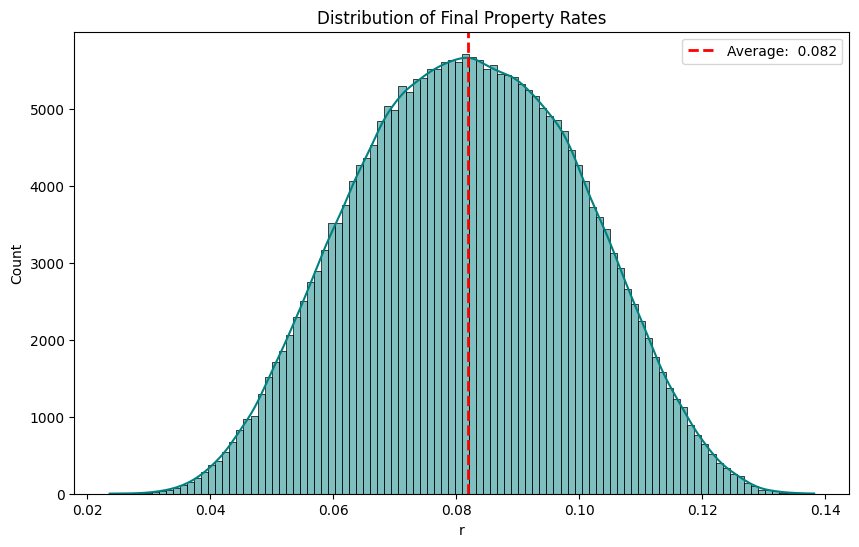

In [64]:
print('Skewness:',skew(dfd['r']))
print('Kurtosis:',kurtosis(dfd['r']))
plt.figure(figsize=(10,6))
sns.histplot(dfd['r'],bins=100,edgecolor='black',color='teal',kde=True)
plt.axvline(dfd['r'].mean(),linestyle='--',linewidth=2,color='red',label=f"Average: {dfd['r'].mean(): .3f}")
plt.title('Distribution of Final Property Rates')
plt.legend()
plt.show()

7. Preparing the target columns for regression and classification.

In [65]:
# Regression column
dfd['future_price_5y']=dfd['Price_in_Lakhs']*((1+dfd['r'])**5)

# Classification column
dfd['future_profit']=dfd['future_price_5y']-dfd['Price_in_Lakhs']
dfd['investment_type']=np.where(dfd['future_profit']>=150,'Very Good',np.where(dfd['future_profit']>=80,'Good',np.where(dfd['future_profit']>=30,'Average','Bad')))
dfd.sample(10)

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Facing,Owner_Type,Availability_Status,Clubhouse,Garden,Gym,Playground,Pool,size_pct,size_score,ptype_score,amen_raw,amen_score,BHK_score,age_score,park_score,sec_score,ava_score,r,future_price_5y,future_profit,investment_type
84078,Rajasthan,Jodhpur,Locality_246,Independent House,2,3434,279.24,0.08,2000,Semi-furnished,25,10,2,Medium,No,No,South,Broker,Under_Construction,1,1,1,1,1,0.651858,0.151858,0.04,4.1,1.000000,0.2,0.285714,0.00,0.0,0.00,0.079839,409.988578,130.748578,Good
108936,Jharkhand,Ranchi,Locality_2,Apartment,1,3746,225.59,0.06,1998,Semi-furnished,27,2,1,High,Yes,Yes,North,Owner,Under_Construction,0,0,0,0,1,0.721590,0.221590,0.02,1.0,0.243902,0.1,0.228571,0.02,0.7,0.00,0.085241,339.586139,113.996139,Good
107597,West Bengal,Kolkata,Locality_33,Villa,4,2920,171.87,0.06,2003,Unfurnished,22,2,10,Medium,Yes,No,South,Builder,Ready_to_Move,1,1,0,1,0,0.538142,0.038142,0.06,2.1,0.512195,0.4,0.371429,0.02,0.0,0.05,0.091320,266.048082,94.178082,Good
27984,Gujarat,Surat,Locality_241,Apartment,1,4153,453.48,0.11,2002,Unfurnished,23,10,6,High,Yes,No,East,Broker,Under_Construction,1,1,0,0,1,0.811358,0.311358,0.02,2.6,0.634146,0.1,0.342857,0.02,0.0,0.00,0.080020,666.373553,212.893553,Very Good
56524,Assam,Silchar,Locality_35,Apartment,4,4404,398.40,0.09,1993,Furnished,32,8,5,Low,Yes,No,North,Owner,Under_Construction,0,1,1,1,0,0.866454,0.366454,0.02,2.1,0.512195,0.4,0.085714,0.02,0.0,0.00,0.090494,614.379384,215.979384,Very Good
97538,Chhattisgarh,Raipur,Locality_57,Independent House,1,3102,319.11,0.10,1995,Unfurnished,30,5,4,Low,Yes,Yes,South,Builder,Under_Construction,1,1,1,1,1,0.577510,0.077510,0.04,4.1,1.000000,0.1,0.142857,0.02,0.7,0.00,0.095025,502.411603,183.301603,Very Good
72740,Tamil Nadu,Chennai,Locality_252,Apartment,4,3492,302.88,0.09,2015,Unfurnished,10,5,3,Medium,No,No,South,Builder,Under_Construction,1,1,1,1,1,0.664792,0.164792,0.02,4.1,1.000000,0.4,0.714286,0.00,0.0,0.00,0.092573,471.545175,168.665175,Very Good
158087,Kerala,Trivandrum,Locality_113,Apartment,4,3186,85.41,0.03,2009,Semi-furnished,16,5,8,Low,No,No,North,Owner,Under_Construction,0,0,0,0,1,0.596718,0.096718,0.02,1.0,0.243902,0.4,0.542857,0.00,0.0,0.00,0.078748,124.769457,39.359457,Average
104893,Kerala,Trivandrum,Locality_318,Apartment,3,1793,459.27,0.26,2007,Semi-furnished,18,10,6,Low,No,Yes,South,Owner,Ready_to_Move,1,0,0,1,1,0.287754,-0.212246,0.02,2.5,0.609756,0.3,0.485714,0.00,0.7,0.05,0.075608,661.206922,201.936922,Very Good
142166,Assam,Guwahati,Locality_422,Apartment,2,3296,462.30,0.14,2001,Unfurnished,24,7,9,Low,No,No,South,Builder,Ready_to_Move,1,0,1,1,1,0.621154,0.121154,0.02,3.5,0.853659,0.2,0.314286,0.00,0.0,0.05,0.082250,686.375942,224.075942,Very Good


8. Saving the cleaned dataset with the above engineered features in parquet format. Parquet format keeps the data types intact.

In [66]:
dfd.to_parquet(r"C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\real_estate_features.parquet",index=False)

9. Creating the dataframe that wil be used for training and testing.

In [67]:
# Checking the columns of dfd dataframe
dfd.columns

Index(['State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status',
       'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Facing',
       'Owner_Type', 'Availability_Status', 'Clubhouse', 'Garden', 'Gym',
       'Playground', 'Pool', 'size_pct', 'size_score', 'ptype_score',
       'amen_raw', 'amen_score', 'BHK_score', 'age_score', 'park_score',
       'sec_score', 'ava_score', 'r', 'future_price_5y', 'future_profit',
       'investment_type'],
      dtype='object')

In [68]:
dfm=dfd.drop(columns=['size_pct','size_score','ptype_score','amen_raw','amen_score','BHK_score','age_score',
                      'park_score','sec_score','ava_score','future_price_5y','future_profit','Year_Built',
                      'Furnished_Status','Locality','Nearby_Schools','Public_Transport_Accessibility',
                      'Parking_Space','Security','Facing','Owner_Type','Availability_Status'])
dfm.columns

Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Age_of_Property',
       'Nearby_Hospitals', 'Clubhouse', 'Garden', 'Gym', 'Playground', 'Pool',
       'r', 'investment_type'],
      dtype='object')

10. Manual Encoding of Property_Type column.

In [69]:
# Encoding Property_Type
ptm={'Apartment':1,'Independent House':2,'Villa':3}
dfm['Property_Type']=dfm['Property_Type'].map(ptm)

# Checking the first few rows
dfm.head(10)

,State,City,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Age_of_Property,Nearby_Hospitals,Clubhouse,Garden,Gym,Playground,Pool,r,investment_type
0,Tamil Nadu,Chennai,1,1,4740,489.76,0.10,35,3,1,1,1,1,1,0.091315,Very Good
1,Maharashtra,Pune,2,3,2364,195.52,0.08,17,1,1,1,1,1,1,0.087628,Good
2,Punjab,Ludhiana,1,2,3642,183.79,0.05,28,8,1,0,1,1,1,0.083584,Good
3,Rajasthan,Jodhpur,2,2,2741,300.29,0.11,34,7,1,1,1,1,1,0.094064,Very Good
4,Rajasthan,Jaipur,3,4,4823,182.90,0.04,23,9,1,1,1,1,1,0.119850,Good
5,West Bengal,Durgapur,1,4,3500,135.28,0.04,5,7,1,0,0,1,0,0.098964,Good
6,Tamil Nadu,Coimbatore,2,3,4826,318.12,0.07,9,6,1,1,0,1,0,0.120521,Very Good
7,Chhattisgarh,Bilaspur,2,5,4252,141.39,0.03,4,10,1,0,1,1,1,0.121653,Good
8,Delhi,New Delhi,3,4,2678,189.16,0.07,22,5,1,1,0,1,0,0.088982,Good
9,Jharkhand,Ranchi,3,2,1393,187.42,0.13,14,3,1,1,1,1,0,0.064310,Average


11. Creating training and testing data using train-test split.

In [70]:
from sklearn.model_selection import train_test_split
x=dfm.drop(columns=['r','investment_type','Price_in_Lakhs'])
y_reg1=dfm['Price_in_Lakhs']
y_reg2=dfm['r']
y_clf=dfm['investment_type']
xtr,xte,ytr_reg1,yte_reg1,ytr_reg2,yte_reg2,ytr_clf,yte_clf=train_test_split(x,y_reg1,y_reg2,y_clf,test_size=0.2,random_state=42,stratify=y_clf)

In [71]:
# Checking the shapes of the train and test sets
print(xtr.shape)
print(xte.shape)
print(ytr_reg1.shape)
print(yte_reg1.shape)
print(ytr_reg2.shape)
print(yte_reg2.shape)
print(ytr_clf.shape)
print(yte_clf.shape)

(200000, 13)
(50000, 13)
(200000,)
(50000,)
(200000,)
(50000,)
(200000,)
(50000,)


In [72]:
# Checking null values in xtr and xte
print(xtr.isnull().sum())
print(xte.isnull().sum())

State               0
City                0
Property_Type       0
BHK                 0
Size_in_SqFt        0
Price_per_SqFt      0
Age_of_Property     0
Nearby_Hospitals    0
Clubhouse           0
Garden              0
Gym                 0
Playground          0
Pool                0
dtype: int64
State               0
City                0
Property_Type       0
BHK                 0
Size_in_SqFt        0
Price_per_SqFt      0
Age_of_Property     0
Nearby_Hospitals    0
Clubhouse           0
Garden              0
Gym                 0
Playground          0
Pool                0
dtype: int64


In [73]:
# Checking the columns of xtr and xte
print("Columns in xtr:",xtr.columns)
print("Columns in xte:",xte.columns)

Columns in xtr: Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_per_SqFt', 'Age_of_Property', 'Nearby_Hospitals', 'Clubhouse',
       'Garden', 'Gym', 'Playground', 'Pool'],
      dtype='object')
Columns in xte: Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_per_SqFt', 'Age_of_Property', 'Nearby_Hospitals', 'Clubhouse',
       'Garden', 'Gym', 'Playground', 'Pool'],
      dtype='object')


12. Using Label Encoder to encode the classification target (investment_type).

In [74]:
from sklearn.preprocessing import LabelEncoder

# For Classification target
le_clf=LabelEncoder()
ytr_clf=le_clf.fit_transform(ytr_clf)
yte_clf=le_clf.transform(yte_clf)

13. Target Encoding the columns of State, City and Locality.

In [75]:
from category_encoders import TargetEncoder

# For State column
te_state=TargetEncoder()
xtr['State']=te_state.fit_transform(xtr['State'],xtr['Size_in_SqFt'])
xte['State']=te_state.transform(xte['State'],xte['Size_in_SqFt'])

# For City column
te_city=TargetEncoder()
xtr['City']=te_city.fit_transform(xtr['City'],xtr['Size_in_SqFt'])
xte['City']=te_city.transform(xte['City'],xte['Size_in_SqFt'])

In [76]:
# Checking the first few rows
print(xtr[['State','City']].head(6))
print(xte[['State','City']].head(6))

              State         City
7722    2745.100040  2751.175223
98597   2767.393382  2771.166900
20944   2745.100040  2751.175223
45432   2752.409046  2772.233202
39917   2741.960020  2766.881346
132429  2741.960020  2716.318927
              State         City
213428  2743.937251  2711.256120
73600   2752.409046  2732.778865
143202  2756.643144  2759.105158
224202  2726.055280  2725.400121
184232  2756.842308  2746.531040
153123  2736.972186  2730.944356


14. Saving the encoders using joblib.

In [77]:
import joblib
import os

# Creating a directory to save the encoders
os.makedirs(r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\encoders',exist_ok=True)

# Saving the label encoder
joblib.dump(le_clf,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\encoders\le_investment_type.joblib')

# Saving the target encoders
joblib.dump(te_state,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\encoders\te_state.joblib')
joblib.dump(te_city,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\encoders\te_city.joblib')

['C:\\Users\\maa\\Desktop\\PYTHON\\My_Projects\\Real Estate Price Prediction and Classification\\data\\encoders\\te_city.joblib']

15. Saving the dataframe (dfm), as a parquet. It does not contain any encoded features.

In [78]:
# Checking the columns of dfm dataframe before saving
dfm.columns

Index(['State', 'City', 'Property_Type', 'BHK', 'Size_in_SqFt',
       'Price_in_Lakhs', 'Price_per_SqFt', 'Age_of_Property',
       'Nearby_Hospitals', 'Clubhouse', 'Garden', 'Gym', 'Playground', 'Pool',
       'r', 'investment_type'],
      dtype='object')

In [79]:
# Saving dfm and also the feature list
import json
dfm.to_parquet(r"C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\dfm_model_inputs.parquet",index=False)
features=[col for col in dfm.columns if col not in ('r','investment_type','Price_in_Lakhs')]
with open(r"C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\feature_list.json",'w') as f:
    json.dump(features,f)

16. Training a baseline model for predicting the Appreciation Rate, 'r', Property prices and Investment type, to measure how simple, untuned models perform and whether the preprocessing and feature engineering are working correctly or not.

In [80]:
# Using Random Forest Regressor for predicting appreciation rate, r.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Training the Random Forest Regressor model for Price_in_Lakhs
rfr_r=RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
rfr_r.fit(xtr,ytr_reg2)
y_r_pred=rfr_r.predict(xte)

# Evaluating the model
print("Mae:",mean_absolute_error(yte_reg2,y_r_pred))
print("Mse:",mean_squared_error(yte_reg2,y_r_pred))
print("R2 Score:",r2_score(yte_reg2,y_r_pred))

Mae: 0.00751682256601696
Mse: 7.926923253558228e-05
R2 Score: 0.754636953795425


In [81]:
# Using Gradient Boosting Regressor for predicting Property Prices.
from sklearn.ensemble import GradientBoostingRegressor

# Training the Random Forest Regressor model for r
gbr_price=GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_depth=3,random_state=42)
gbr_price.fit(xtr,ytr_reg1)
y_price_pred=gbr_price.predict(xte)

# Evaluating the model
print("Mae:",mean_absolute_error(yte_reg1,y_price_pred))
print("Mse:",mean_squared_error(yte_reg1,y_price_pred))
print("R2 Score:",r2_score(yte_reg1,y_price_pred))

Mae: 10.829007108973085
Mse: 187.7109819646571
R2 Score: 0.9905970322116022


In [82]:
# Using Random Forest Classifier for predicting Investment Type.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Training the Random Forest Classifier model for investment_type
rfc_it=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rfc_it.fit(xtr,ytr_clf)
y_it_pred=rfc_it.predict(xte)

# Evaluating the model
print('Confusion Matrix:\n',confusion_matrix(yte_clf,y_it_pred))
print('\nClassification Report:\n',classification_report(yte_clf,y_it_pred))

Confusion Matrix:
 [[ 9310   589  1427     0]
 [  706  5015     0     0]
 [  930     0 12779  1650]
 [    0     0  2089 15505]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84     11326
           1       0.89      0.88      0.89      5721
           2       0.78      0.83      0.81     15359
           3       0.90      0.88      0.89     17594

    accuracy                           0.85     50000
   macro avg       0.86      0.85      0.86     50000
weighted avg       0.85      0.85      0.85     50000



17. Evaluating models to check which performs best for a particular target using Cross Val Score.

- Evaluating Random Forest Regressor performance for prediction of Appreciation Rate (r).

In [83]:
from sklearn.model_selection import cross_val_score

# Initialising the models
rfr_m_r=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1,max_depth=15,min_samples_split=5,min_samples_leaf=2)
rfr_m_r_s=cross_val_score(rfr_m_r,xtr,ytr_reg2,cv=5,scoring='neg_mean_absolute_error')
rfr_m_r_mae=-rfr_m_r_s
print("Cross-validated MAE scores for Random Forest Regressor (r):",rfr_m_r_mae)
print("Average MAE:",rfr_m_r_mae.mean())
print("Standard deviation:",rfr_m_r_mae.std())

Cross-validated MAE scores for Random Forest Regressor (r): [0.0074603  0.00748047 0.00747211 0.00743513 0.00745387]
Average MAE: 0.007460376053389862
Standard deviation: 1.5627284738141676e-05


In [84]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
rfr_m_r.fit(xtr,ytr_reg2)

,n_estimators,300
,criterion,'squared_error'
,max_depth,15
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Evaluating XGBoost Regressor performance for prediction of Appreciation Rate (r).

In [85]:
from xgboost import XGBRegressor
xgb_m_r=XGBRegressor(n_estimators=300,max_depth=6,learning_rate=0.05,subsample=0.8,colsample_bytree=0.7,random_state=42)
xgb_m_r_s=cross_val_score(xgb_m_r,xtr,ytr_reg2,cv=5,scoring='neg_mean_absolute_error')
xgb_m_r_mae=-xgb_m_r_s
print("Cross-validated MAE scores for XGBoost Regressor (r):",xgb_m_r_mae)
print("Average MAE:",xgb_m_r_mae.mean())
print("Standard deviation:",xgb_m_r_mae.std())

Cross-validated MAE scores for XGBoost Regressor (r): [0.00736703 0.00740224 0.00740082 0.00735035 0.0073782 ]
Average MAE: 0.007379727977646156
Standard deviation: 1.9890425872112133e-05


In [86]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
xgb_m_r.fit(xtr,ytr_reg2)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


- Evaluating Random Forest Regressor performance for prediction of Property Prices (Price_in_Lakhs).

In [87]:
rfr_m_p=RandomForestRegressor(n_estimators=400,random_state=42,n_jobs=-1,max_depth=20,min_samples_split=5,min_samples_leaf=2)
rfr_m_p_s=cross_val_score(rfr_m_p,xtr,ytr_reg1,cv=5,scoring='neg_mean_absolute_error')
rfr_m_p_mae=-rfr_m_p_s
print("Cross-validated MAE scores for Random Forest Regressor (Price_in_Lakhs):",rfr_m_p_mae)
print("Average MAE:",rfr_m_p_mae.mean())
print("Standard deviation:",rfr_m_p_mae.std())

Cross-validated MAE scores for Random Forest Regressor (Price_in_Lakhs): [6.90627213 6.94860266 6.94870467 6.9148902  6.90330365]
Average MAE: 6.924354663946805
Standard deviation: 0.020201915572963688


In [88]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
rfr_m_p.fit(xtr,ytr_reg1)

,n_estimators,400
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Evaluating XGBoost Regressor performance for prediction of Property Prices (Price_in_Lakhs).

In [89]:
xgb_m_p=XGBRegressor(n_estimators=300,max_depth=6,learning_rate=0.05,subsample=0.8,colsample_bytree=0.8,min_child_weight=3,random_state=42)
xgb_m_p_s=cross_val_score(xgb_m_p,xtr,ytr_reg1,cv=5,scoring='neg_mean_absolute_error')
xgb_m_p_mae=-xgb_m_p_s
print("Cross-validated MAE scores for XGBoost Regressor (Price_in_Lakhs):",xgb_m_p_mae)
print("Average MAE:",xgb_m_p_mae.mean())
print("Standard deviation:",xgb_m_p_mae.std())

Cross-validated MAE scores for XGBoost Regressor (Price_in_Lakhs): [7.05911369 7.13354261 7.14532352 7.07021411 7.07236026]
Average MAE: 7.096110836278439
Standard deviation: 0.03585120419408989


In [90]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
xgb_m_p.fit(xtr,ytr_reg1)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


- Evaluating Random Forest Classifer performance for prediction of Type of Investment (investment_type).

In [91]:
rfc_m_c=RandomForestClassifier(n_estimators=300,max_depth=12,min_samples_split=5,min_samples_leaf=2,random_state=42,n_jobs=-1)
rfc_m_c_s=cross_val_score(rfc_m_c,xtr,ytr_clf,cv=5,scoring='f1_weighted')
print('Cross-validated weighted f1 scores for Random Forest Classifier (investment_type):',rfc_m_c_s)
print('Average weighted f1 score:',rfc_m_c_s.mean())
print('Standard deviation:',rfc_m_c_s.std())

Cross-validated weighted f1 scores for Random Forest Classifier (investment_type): [0.83675383 0.83199893 0.83539657 0.8363995  0.83630699]
Average weighted f1 score: 0.8353711629416296
Standard deviation: 0.0017445683978264549


In [92]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
rfc_m_c.fit(xtr,ytr_clf)

,n_estimators,300
,criterion,'gini'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


- Evaluating XGBoost Classifer performance for prediction of Type of Investment (investment_type).

In [93]:
from xgboost import XGBClassifier
xgb_m_c=XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,
                      min_child_weight=3,objective='multi:softprob',num_class=4,random_state=42,n_jobs=-1)
xgb_m_c_s=cross_val_score(xgb_m_c,xtr,ytr_clf,cv=5,scoring='f1_weighted')
print('Cross-validated weighted f1 scores for XGBoost Classifier (investment_type):',xgb_m_c_s)
print('Average weighted f1 score:',xgb_m_c_s.mean())
print('Standard deviation:',xgb_m_c_s.std())

Cross-validated weighted f1 scores for XGBoost Classifier (investment_type): [0.86315539 0.85613986 0.86074795 0.86161196 0.86093482]
Average weighted f1 score: 0.8605179950724476
Standard deviation: 0.002347222864217733


In [94]:
# Training the model before saving it as joblib file so that it can be used in MLFlow
xgb_m_c.fit(xtr,ytr_clf)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


18. So after running the experiments with various models, the three models that have performed the best are as follows:
    - rfr_m_p : The model that predicts property prices.
    - xgb_m_r : The model that predicts the appreciation rate for a property.
    - xgb_m_c : The model that predicts whether the investment would be bad, average, good or very good.
    
    We will save these three models in a joblib file for now.

In [95]:
import joblib
import os

# Creating the folder where models will be saved
os.makedirs(r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\saved_models',exist_ok=True)

# XGB Regressor model for Appreciation Rate (r)
joblib.dump(xgb_m_r,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\saved_models\xgb_model_r.joblib')

# Random Forest Regressor model for Property Price (Price_in_Lakhs)
joblib.dump(rfr_m_p,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\saved_models\rfr_model_price.joblib')

# XGB Classifier model for Investment Type (investment_type)
joblib.dump(xgb_m_c,r'C:\Users\maa\Desktop\PYTHON\My_Projects\Real Estate Price Prediction and Classification\data\saved_models\xgb_model_clf.joblib')

['C:\\Users\\maa\\Desktop\\PYTHON\\My_Projects\\Real Estate Price Prediction and Classification\\data\\saved_models\\xgb_model_clf.joblib']